# CA 2, Interactive Learning, Fall 2024
- **Name**: Majid Faridfar
- **Student ID**: 810199569

## Problem 1
What is the difference between reinforcement learning and supervised learning? Explain by providing two similar problems: one that requires reinforcement learning to solve, and another that can be solved with supervised learning.

Differences:
- How to learn? 
  - RL is based on an agent interacting with an environment. The agent takes actions, receives feedback in the form of rewards or penalties, and aims to maximize the cumulative reward over time. The feedback is sparse and often delayed, and there’s no explicit label or correct answer for each action.
  - SL involves learning from labeled data where each input comes with a corresponding correct output (label). The model is trained to map inputs to outputs based on this labeled dataset.

- What is the goal?
  - The goal of RL is to learn a strategy (or policy) that will maximize the total reward over time. The agent learns through trial and error, exploring and exploiting the environment to improve its decisions.
  - The goal of SL is to minimize the error between the predicted output and the true label, thereby learning a mapping function from inputs to outputs.

Illustration (Maze):
- A robot (agent) is placed in a maze (environment) and has to navigate from the start to the goal. The robot takes actions such as moving left, right, up, or down. Initially, it doesn’t know the best path to take and receives feedback in the form of rewards (e.g., +1 for reaching the goal, -1 for hitting a wall or making a wrong turn). The goal is to maximize the cumulative reward by learning which actions lead to the goal. The robot learns over time by exploring different paths, receiving feedback, and adjusting its strategy based on the rewards it receives.
- Instead of having the robot learn by exploring the maze, you collect a dataset of maze configurations (states) and the correct sequence of moves (labels) that leads to the goal. For each configuration, you have a label indicating the correct next action (e.g., move left, move right, etc.). You train a model on this labeled dataset to predict the correct action for a given maze state. Once trained, the model can predict the correct move for any new maze configuration.

## Problem 2
In an MDP problem, if the reward function undergoes a linear transformation, does the optimal policy change? (Provide a mathematical proof or a counterexample, and ignore the trivial case of multiplying by zero.) Does the answer to this question depend on whether the task is continuing or episodic?

A general linear transformation of a reward function $R(s, a)$ is:

$$R'(s, a) = \alpha R(s, a) + \beta$$
where $\alpha > 0$ and $\beta$ is a scalar.

Here, we will show that when the reward function undergoes a linear transformation like this, the optimal policy does **not** change. This conclusion holds for both continuing and episodic tasks.

### Understanding Optimal Policies:

The goal in an MDP is to find an optimal policy $\pi^*$ that maximizes the **expected cumulative reward**. Depending on whether the problem is episodic or continuing, this objective is either the total expected reward (episodic task) or the expected discounted cumulative reward (continuing task). We’ll focus on the discounted scenario, as the principles generalize well.

In a discounted setting, the objective is to maximize the expected return,

$$G_t = \mathbb{E}_\pi \left[ \sum_{k=0}^{\infty} \gamma^k R(s_{t+k}, a_{t+k}) | s_t = s, a_t = a \right]$$
where $\gamma$ is the discount factor such that $0 \leq \gamma \leq 1$ (if $\gamma$ is equal to $1$, then we are calculating the expected cumulative reward).

We define the value function $V^\pi(s)$ under a policy $\pi$ as:

$$V^\pi(s) = \mathbb{E}_\pi \left[ \sum_{k=0}^{\infty} \gamma^k R(s_{t+k}, a_{t+k}) \middle| s_t = s \right]$$

Similarly, the action-value function or Q-value function $Q^\pi(s, a)$ is:

$$Q^\pi(s, a) = \mathbb{E}_\pi \left[ \sum_{k=0}^{\infty} \gamma^k R(s_{t+k}, a_{t+k}) \middle| s_t = s, a_t = a \right]$$

The optimal policy is the one that maximizes the value or Q-value function, satisfying:

$$\pi^*(s) = \arg\max_a Q^*(s, a)$$

#### Effect on the Value Function:

With the new transformed reward function $R'(s, a) = \alpha R(s, a) + \beta$, the new value function $V'^\pi(s)$ under policy $\pi$ becomes:

$$V'^\pi(s) = \mathbb{E}_\pi \left[ \sum_{k=0}^{\infty} \gamma^k R'(s_{t+k}, a_{t+k}) \middle| s_t = s \right]
         = \mathbb{E}_\pi \left[ \sum_{k=0}^{\infty} \gamma^k (\alpha R(s_{t+k}, a_{t+k}) + \beta) \middle| s_t = s \right]$$

This expands into:

$$V'^\pi(s) = \alpha \mathbb{E}_\pi \left[ \sum_{k=0}^{\infty} \gamma^k R(s_{t+k}, a_{t+k}) \middle| s_t = s \right]
         + \beta \mathbb{E}_\pi \left[ \sum_{k=0}^{\infty} \gamma^k \middle| s_t = s \right]$$

Shortening the notation, we have:

$$V'^\pi(s) = \alpha V^\pi(s) + \beta \frac{1}{1 - \gamma}$$

where the sum $\sum_{k=0}^{\infty} \gamma^k = \frac{1}{1-\gamma}$ because it is a geometric series.

#### Effect on the Q-Value Function:

Similarly, the transformed Q-value function would be:

$$Q'^\pi(s, a) = \alpha Q^\pi(s, a) + \beta \frac{1}{1 - \gamma}$$

### Does the Optimal Policy Change?

Answer is no. The optimal policy $\pi^*(s)$ is determined by selecting the action $a$ that maximizes the Q-value function:

$$\pi^*(s) = \arg\max_a Q^*(s, a)$$

When applying the linear transformation, the transformed Q-value function satisfies:

$$Q'^\pi(s, a) = \alpha Q^\pi(s, a) + \beta \frac{1}{1 - \gamma}$$

Since $\alpha > 0$, this transformation preserves the order of the Q-values. That is, if action $a_1$ was better than action $a_2$ before the transformation (i.e., $Q^*(s, a_1) > Q^*(s, a_2)$), it will remain better after the transformation because the transformation is a positive linear scaling and a constant shift, both of which do not affect the relative ordering of numbers:

$$Q'^\pi(s, a_1) = \alpha Q^\pi(s, a_1) + \beta \frac{1}{1 - \gamma}$$
$$Q'^\pi(s, a_2) = \alpha Q^\pi(s, a_2) + \beta \frac{1}{1 - \gamma}$$

Thus, $Q^\pi(s, a_1) > Q^\pi(s, a_2) \Rightarrow Q'^\pi(s, a_1) > Q'^\pi(s, a_2)$.

Since the relative rankings of the Q-values are preserved, the optimal action $\arg\max_a Q^*(s, a)$ does not change. Therefore, the optimal policy remains the same.

The answer does not depend on whether the task is continuing or episodic. In an episodic task, you would also be maximizing the expected return, but limited to a certain number of steps before the episode ends. The reasoning around the transformation of the reward function and its impact on the Q-value functions still holds because the transformation is applied uniformly across the rewards, and the policy that maximizes value remains unchanged.

## Problem 3
Assume a robot operates in a grid environment as follows. In each episode, the robot starts in one of the cells in the bottom row (with an equal probability of starting in each cell). The robot can move left, right, or up. If the robot chooses to move in a direction where there is a wall, it remains in place. If the robot enters one of the green cells, the episode ends.

![pics/P3.png](pics/P3.png)

### Scenario 1

The robot knows the grid environment completely and is aware of its current location at any moment, using this information to make decisions. The goal is for the robot to reach the second row and enter one of the green cells. If the robot enters a green cell, it receives a reward of +1 (and the episode ends), and if it moves from one blue cell to another blue cell, it receives a reward of 0. For this task, $\lambda = 0.9$.

#### a
Can the defined task be represented by an MDP? If not, explain why; if yes, fully specify the MDP.

Yes, this task can be defined by an MDP. To fully specify the Markov Decision Process (MDP) for this task, we need to define **States (S)**, **Actions (A)**, **Transition probabilities (P(s'|s,a))**, **Rewards (R(s,a))**, and **Discount Factor (λ)**.

##### States (S):
The states are the cells in the grid:
- S1, S2, S3, S4, S5, S6, S7 represent the blue cells.
- T1, T3, and T5 are the green terminal cells (absorbing states).

So the state space is:
$$S = \{S1, S2, S3, S4, S5, S6, S7, T1, T3, T5\}$$

##### Actions (A):
The robot has three possible actions in the bottom row: **Up (U)**, **Left (L)**, **Right (R)**. However, when the robot is in the terminal green cells T1, T3, T5, the episode ends, and no further actions are available.

Thus, the action set is:
$$A = \{\text{Up}, \text{Left}, \text{Right}\}$$

##### Transition Probabilities (P(s' | s, a)):
The robot transitions deterministically (we assume that there is no stochastic behavior, since it is not mentioned in the problem), so the probability of transitioning from one state to another depends on whether the robot encounters a wall.

- Moving "Left" in state S1 will not change the state.
- Moving "Up" in states S2, S4, S6 will move the robot into the green cells (and stop the episode), while in other states will not change the state.
- Moving "Right" in state S7 will not change the state.

Here are the key deterministic transitions:

- **Up movement**:
  - $P(T1 | S2, U) = 1$
  - $P(T3 | S4, U) = 1$
  - $P(T5 | S6, U) = 1$
  - Other cases: The robot stays in the current state if "Up" is attempted from a cell without a green terminal cell above it.

- **Left movement**:
  - $P(S1 | S2, L) = 1$
  - $P(S2 | S3, L) = 1$
  - $P(S3 | S4, L) = 1$
  - $P(S4 | S5, L) = 1$
  - $P(S5 | S6, L) = 1$
  - $P(S6 | S7, L) = 1$
  - Other cases: The robot stays in the current state if "Left" is attempted from  S1.

- **Right movement**:
  - $P(S2 | S1, R) = 1$
  - $P(S3 | S2, R) = 1$
  - $P(S4 | S3, R) = 1$
  - $P(S5 | S4, R) = 1$
  - $P(S6 | S5, R) = 1$
  - $P(S7 | S6, R) = 1$
  - Other cases: The robot stays in the current state if "Right" is attempted from  S7.

##### Rewards (R(s,a)):
The robot receives:
- A reward of **+1** upon entering a terminal green cell (T1, T3, T5).
- A reward of **0** for any movement from one blue cell to another blue cell.

Thus, the rewards are:
- $R(s' | s, U) = 1$ if the robot moves from S2 to T1, S4 to T3, or S6 to T5.
- $R(s' | s, a) = 0$ for any other movement.

For example:
- $R(T1 | S2, U) = 1$,
- $R(T3 | S4, U) = 1$,
- $R(T5 | S6, U) = 1$,
- $R(S2 | S3, L) = 0$,
- $R(S6 | S5, R) = 0$, etc.

##### Discount Factor $λ$:
The **discount factor** is $λ = 0.9$. This means that rewards received in future states are weighted by a factor of 0.9 for every step into the future. It reflects the agent's preference for immediate rewards over delayed ones.

#### b
How many optimal deterministic policies exist for solving this task? Appropriately express $\pi(s)$ for each.

To define the optimal policy, we go state by state and analyze the optimal actions:

1. **S1**: The only possible optimal action here is to move **right**, since other actions are blocked by a wall. Thus, for $\pi(S1)$:
$$\pi(S1) = \text{R}$$
- Hence, there’s only **one optimal action** in S1.

2. **S2**: The optimal way to immediately end the episode and earn a reward is to move **Up** into the green terminal state T1. Thus:
$$\pi(S2) = \text{U}$$
- Hence, there’s only **one optimal action** in S2.

3. **S3**: Moving **Up** is not blocked by the above wall. From S3, the robot can either move **left** to S2, letting it access the green cell T1, or move **right** to S4, potentially heading toward T3. Since rewards are the same (all terminal cells give +1 and actions cost 0), **both left and right are equally optimal** choices. Therefore:
$$\pi(S3) = \text{L or R}$$
- Hence, there are **two optimal actions** in S3.

4. **S4**: The optimal action in state S4 is to move **Up** into T3 immediately to end the episode. Thus:
$$\pi(S4) = \text{U}$$
- Hence, there’s only **one optimal action** in S4.

5. **S5**: Robot can move **right** toward S6 to reach the green terminal T5, or **left** to S4 and reach T3. Since both terminal cells T3 and T5 give the same reward, either direction is optimal. Therefore:
$$\pi(S5) = \text{L or R}$$
- Hence, there are **two optimal choices** in S5.

6. **S6**: The optimal action is to go **Up** to T5 immediately. Thus:
$$\pi(S6) = \text{U}$$
- Hence, there’s only **one optimal action** in S6.

7. **S7**: Since S7 has no option but to move **left** (right and up are blocked by a wall), the optimal policy is:
$$\pi(S7) = \text{L}$$
- Hence, there’s only **one optimal action** in S7.

---

- In **S1, S2, S4, S6, S7**, the robot has only **one optimal action**.
- In **S3, S5**, the robot has **two optimal choices**: move left or right.

Therefore, the total number of **optimal deterministic policies** is:

$$\text{Total optimal policies} = 2 \times 2 = 4$$

---

![pics/P3S1b.png](pics/P3S1b.png)

1. **Policy 1**:
$$\pi(S1) = \text{R}, \quad \pi(S2) = \text{U}, \quad \pi(S3) = \text{L}, \quad \pi(S4) = \text{U}, \quad \pi(S5) = \text{L}, \quad \pi(S6) = \text{U}, \quad \pi(S7) = \text{L}$$
   
2. **Policy 2**:
$$\pi(S1) = \text{R}, \quad \pi(S2) = \text{U}, \quad \pi(S3) = \text{L}, \quad \pi(S4) = \text{U}, \quad \pi(S5) = \text{R}, \quad \pi(S6) = \text{U}, \quad \pi(S7) = \text{L}$$

3. **Policy 3**:
$$\pi(S1) = \text{R}, \quad \pi(S2) = \text{U}, \quad \pi(S3) = \text{R}, \quad \pi(S4) = \text{U}, \quad \pi(S5) = \text{L}, \quad \pi(S6) = \text{U}, \quad \pi(S7) = \text{L}$$

4. **Policy 4**:
$$\pi(S1) = \text{R}, \quad \pi(S2) = \text{U}, \quad \pi(S3) = \text{R}, \quad \pi(S4) = \text{U}, \quad \pi(S5) = \text{R}, \quad \pi(S6) = \text{U}, \quad \pi(S7) = \text{L}$$

### Scenario 2

The robot has no knowledge of the environment it's in. It has distance sensors on all four sides that tell it whether or not there is a wall next to it. For example, consider the images below.

![pics/P3S2.png](pics/P3S2.png)

Assume the objective is similar to the first scenario. In terms of key elements of an MDP, what has changed here? Can this problem still be represented by an MDP in a way that ultimately fulfills our objective? (Is the optimal policy what we want it to be?)

Yes, the problem can still be represented by a **Markov Decision Process (MDP)**, as it fundamentally satisfies the requirements for an MDP. But there are key changes because the robot no longer knows exactly where it is within the environment.

#### State Space (S)
In general, states in this MDP are based on the robot’s sensory input: `{right, up, left, down}`. Each direction can either be blocked (0) or unblocked (1), thus defining the state space. Each state represents the robot’s local sensory information and position within the context of the grid. To simplify, we can define states $S_1, S_2, S_3, ...$ based on these sensory inputs.

- **$S_1$**: Sensor reading `{right: 1, up: 0, left: 0, down: 0}`.
- **$S_2$**: Sensor reading `{right: 0, up: 0, left: 1, down: 0}`.
- **$S_3$**: Sensor reading `{right: 1, up: 0, left: 1, down: 0}`.
- **$S_4$** (Ambiguous state): Sensor reading `{right: 1, up: 1, left: 1, down: 0}`.
- **$S_5$** (terminal state): Sensor reading `{right: 0, up: 0, left: 0, down: 1}`. In can be either green or red.

Thus, the **finite state space $S$** is:
$$S = \{ S_1, S_2, S_3, S_4, S_5 \}$$

#### Action Space (A)
We define actions based on directional movements:
- **$A_1$**: **Move Up**. The robot tries to move to a cell directly above in this action.
- **$A_2$**: **Move Right**. The robot moves to the neighboring cell to the right.
- **$A_3$**: **Move Left**. The robot moves to the neighboring cell to the left.
  
Thus, the **action space $A$** is:
$$A = \{ A_1, A_2, A_3 \} = \{ \text{Up}, \text{Right}, \text{Left} \}$$

#### Transition Function (P(s', s, a))
Using states $S_1 \ldots S_5$ and actions $A_1, A_2, A_3$, consider each transition:

| State Transition        | Action: Up | Action: Right | Action: Left |
|-------------------------|------------------------|-----------------------------|----------------------------|
| **$S_1$ → $S_1$** | 1 (blocked)            | 0                            | 1 (blocked)                  |
| **$S_1$ → $S_4$** | 0                      | 1                            | 0                            |
| **$S_2$ → $S_2$** | 1 (blocked)            | 1 (blocked)                  | 0                            |
| **$S_2$ → $S_4$** | 0                      | 0                            | 1                            |
| **$S_3$ → $S_3$** | 1 (blocked)            | 0                            | 0                            |
| **$S_3$ → $S_4$** | 0                      | 1                            | 1                            |
| **$S_4$ → $S_3$** | 0                      | $\frac{2}{3}$ (probabilistic)| $\frac{2}{3}$ (probabilistic)|
| **$S_4$ → $S_2$** | 0                      | $\frac{1}{3}$ (probabilistic)| 0                            |
| **$S_4$ → $S_1$** | 0                      | 0                            | $\frac{1}{3}$ (probabilistic)|
| **$S_4$ → $S_5$** | 1 (terminal)           | 0                            | 0                            |

Above:
- **Blocked transitions** (e.g., "Up" when no upward movement is possible) have a **probability of 1** for staying in the same state.
- Probabilistic transitions from $S_4$ to $S_1$, $S_2$, or $S_3$ when moving left or right.
- Moving **up** from $S_4$ always leads to the terminal state $S_5$ with probability **1**.

#### Reward Function (R(s, a))
The reward structure also changes slightly. Instead of rewards depending on grid positions, the **reward is now a function of the sensor state** and the action taken:

- If the robot takes the **Up** action in a sensor state where **Up is allowed** (i.e., there's no wall above), and this move leads to a terminal green cell, the robot gets a reward of **+1**.
- For all other valid moves (where no immediate green state is reached), the robot receives **0 reward**.
- If the robot tries an invalid action (e.g., moving into a wall), it stays in the same state and still receives a reward of **0**.
  
So, the reward function can be expressed as:

$$R(s' | s, a) = 
     \begin{cases}
       +1 & \text{If s = \{right: 1, up: 1, left: 1, down: 0\}, and a is \text{Up}} \\
       0 & \text{Otherwise}
     \end{cases}$$

#### Discount Factor (λ)
The problem didn't change the discount factor, so $\lambda$ remains at 0.9, meaning that future rewards are discounted slightly but still carry weight.

---

The optimal policy in the original problem was to **quickly reach the green terminal cells** by moving up when possible (if there was no wall above) and moving horizontally if necessary.

In this new formulation, the **optimal policy would still aim to achieve the same goal**—the robot must use its sensor readings to figure out:
- When it's best to move **Up** into a terminal cell,
- How to move **Left** or **Right** to position itself below a terminal (green) cell if it's not already there.

Thus, **in the optimal policy**, the robot will:
- Move **Up** when its sensors indicate that moving up is allowed (i.e., in a sensor state like `{right: 1, up: 1, left: 1, down: 0}`).
- Move **Left** or **Right** when needed to position itself for optimal transitions.

Thus, the optimal policy will likely involve:
$$
\pi(s) = \begin{cases} 
\text{Up} & \text{If s = \{right: 1, up: 1, left: 1, down: 0\}} \\
\text{Right/Left} & \text{If s = \{right: 1, up: 0, left: 1, down: 0\}} \\
\text{Right} & \text{If s = \{right: 1, up: 0, left: 0, down: 0\}} \\
\text{Left} & \text{If s = \{right: 0, up: 0, left: 1, down: 0\}} \\
\end{cases}
$$

So, the **optimal policy** still fulfills the ultimate goal by appropriately guiding the robot to the green terminal cells using sensor-guided movements. Therefore, under this formulation, the robot will still eventually learn the optimal way to achieve the goal.

### Scenario 3

Assume everything is the same as in Scenario 2, but our objective has changed, and we want the robot to enter only the two green cells on the left and right. If the robot enters the red cell in the figure below, it will receive a reward of -1, and if it enters one of the green cells, it will receive a reward of +1 (all other rewards are zero). For this task, $\lambda = 0.9$.

![pics/P3S3.png](pics/P3S3.png)

#### a
Can this problem still be represented by an MDP in a way that ultimately fulfills our objective? (Is the optimal policy what we want it to be?) If it can be represented, provide the desired optimal policy. If it cannot, explain what should be done, given the robot's input data, so that the robot can find an optimal policy that meets our objective.

This problem can indeed be represented by a **Markov Decision Process (MDP)**. In MDPs, the environment's dynamics are expressed through states, actions, transitions, and rewards (the MDP is fully provided in the next section of question). The robot’s states can be represented as its position in the grid, its actions are left, right, and up, the rewards are received when entering specific "trial" cells (green +1 and the red -1), and the transitions outline how the robot moves based on its actions.

However, **the optimal policy derived from this MDP may not be the one we desire** due to the robot's sensory limitation. From the robot’s perspective, when it starts in the bottom row, each of the bottom cells under the green or red cells looks the same until it receives feedback from the current state or the environment (i.e., reaching a terminal state). The robot does not know which upper cell will end up being a red or green cell because, from its starting position, all adjacent walls or sensors are identical. As a result, the optimal policy might make it behave similarly in cells beneath the red and green cells, which is not aligned with the desired behavior — the robot should avoid the cell under the red cell and prefer moving toward the cells under the green cells.

##### Improved Distance Sensors as a Solution:
To solve this issue, one method would be to modify the sensing capabilities of the robot. Currently, the robot’s sensors only tell it whether there’s a wall directly adjacent to it. If we **extend the sensor range** to allow the robot to detect walls that are a bit farther away (say, one extra cell ahead), the robot can then detect the presence of walls that define the boundary of the grid. This information can be crucial because the robot could infer whether it is in a corner (leftmost or rightmost cell) and indirectly deduce it is situated under one of the green target cells. When the robot detects no side walls, it knows it must be under the red cell, and thus the correct action would be to avoid moving up.

With this extension to the robot’s sensors, the robot is able to recognize its position as either closer to the green terminal cells (left and right sides) or closer to the red terminal cell in the center. This extra sensory information helps the robot find an **optimal policy** that adheres to the task requirement of maximizing the number of times it reaches the green cells and minimizing the number of times it reaches the red cell.

##### Alternative Approaches:

There are alternative ways to resolve this problem without increasing the sensor range:

1. **Learning from Experience via Reinforcement Learning**:
    Instead of adjusting the robot's sensors, you can allow the robot to learn the environment through experience in the form of **Reinforcement Learning (RL)** algorithms such as Q-learning or SARSA. By using feedback (positive and negative rewards), the robot can gradually learn which states lead to favorable outcomes (green cells) and which states lead to undesirable outcomes (red cell) without needing upfront modifications to its sensors. Through exploration, it can distinguish the three bottom cells indirectly by learning the rewards that result from moving up from those cells.
   
   After a sufficient amount of exploration, the robot will learn that moving up from the cells below the green ones gives rewards, while moving up from the one below the red gives a penalty. As RL focuses on maximizing cumulative reward, the optimal policy will be to favor actions that lead to the green cells and avoid actions that lead to the red cell.

2. **Pre-training the Robot**:
   If time or reliability is a concern with the RL approach, you could **pre-train the robot** in a simulated environment to have it discover the favorable policy before deployment. By running multiple simulations in diverse grid configurations beforehand, the robot can learn to recognize patterns related to corner cells (green cells) and mid-grid cells (red cell). Once trained with a policy that favors green cells and avoids the red cell, it can be deployed with that knowledge.

3. **Adding State Identifiers**:
   Another solution is to introduce **state-based identifiers** (labels or distinct features) in the cells themselves. If each cell in the lower row had some distinguishing feature, such as a slight variation (visual cue, color, or numeric label), the robot’s input data could contain enough information to differentiate between the different regions under the green and red cells. This could be more practical than adjusting the robot’s sensory hardware for some real-world applications.

##### Final Thoughts:

1. **Distance Sensors Enhancement**: Extending the sensors to perceive walls that are farther away allowing the robot to infer its position with better accuracy.

2. **Reinforcement Learning**: Allowing the robot to learn over time what the rewards of different states and actions are will naturally lead it to avoid the red cell over many episodes.

3. **Pre-training**: Using simulations to help the robot develop an appropriate policy before it encounters the actual environment.

4. **State Identifiers**: Each bottom row cell can have distinguishing features that make differentiation possible with existing sensors.

In summary, while this problem is representable as an MDP, the optimal policy won't directly reflect the task's requirements because of the limitations of the robot’s input data (sensors). Enhancing the sensors, investing in RL, or simply marking the states differently are viable ways to tune the robot's policy toward the task objective.


#### b
If you solve Scenario 3 using dynamic programming methods, what MDP does the optimal solution correspond to? Represent the states of this MDP with $s_j$ (for $j = 0, 1, \dots$), and indicate which grid cells correspond to these states. Represent the actions with $a_i$ (for $i = 0, 1, 2, \dots$) and specify which robot actions they correspond to. Define the probability matrix $P$ accordingly.

![pics/P3S3b](pics/P3S3b.png)

##### States $s_j$
In general, states in this MDP are based on the robot’s sensory input: `{right, up, left, down}`. Each direction can either be blocked (0) or unblocked (1), thus defining the state space. Each state represents the robot’s local sensory information and position within the context of the grid. To simplify, we can define states $S_1, S_2, S_3, ...$ based on these sensory inputs.

- **$S_1$**: Sensor reading `{right: 1, up: 0, left: 0, down: 0}`.
- **$S_2$**: Sensor reading `{right: 0, up: 0, left: 1, down: 0}`.
- **$S_3$**: Sensor reading `{right: 1, up: 0, left: 1, down: 0}`.
- **$S_4$** (Ambiguous state): Sensor reading `{right: 1, up: 1, left: 1, down: 0}`.
- **$S_5$** (terminal state): Sensor reading `{right: 0, up: 0, left: 0, down: 1}`. In can be either green or red.

Thus, the **finite state space $S$** is:
$$S = \{ S_1, S_2, S_3, S_4, S_5 \}$$

##### Actions $a_i$
We define actions based on directional movements:
- **$A_1$**: **Move Up**. The robot tries to move to a cell directly above in this action.
- **$A_2$**: **Move Right**. The robot moves to the neighboring cell to the right.
- **$A_3$**: **Move Left**. The robot moves to the neighboring cell to the left.
  
Thus, the **action space $A$** is:
$$A = \{ A_1, A_2, A_3 \} = \{ \text{Up}, \text{Right}, \text{Left} \}$$

##### Transition Function
This part describes how the robot transitions between states given specific actions. We assume transitions are **deterministic** and depend on whether the action is allowable based on the current sensory readings.

**Transition for Action $A_1$ (Up)**
- **$S_1$ through $S_3$ → $S_1, S_2, S_3$** (No change)
  - If the robot tries to move **Up** in states $S_1, S_2, S_3$ where **moving up is blocked**, the robot stays in the same state.
  
- **$S_4$ → $S_5$**
  - If the robot moves **Up** from $S_4$, it reaches one of the terminal cells (green or red), hence transitioning to the terminal state $S_5$.

**Transition for Action $A_2$ (Right)**
- **$S_1$ → $S_4$**: Move from the far left $S_1$ into the ambiguous central position $S_4$.
  
- **$S_3$ → $S_4$**: Move within the middle. From $S_3$, moving right brings the robot to the ambiguous central position $S_4$.

- **$S_4$ → $S_3$ or $S_2$**: Moving **right** from $S_4$ potentially takes the robot to $S_2$ (For $\frac{1}{3}$ times-S6) or $S_3$ (For $\frac{2}{3}$ times-S2 and S4).

**Transition for Action $A_3$ (Left)**
- **$S_2$ → $S_4$**: Move from the far right $S_2$ to the central ambiguous state $S_4$.
  
- **$S_3$ → $S_4$**: Move from a middle position to the ambiguous $S_4$.

- **$S_4$ → $S_3$ or $S_1$**: Moving **left** from $S_4$ potentially takes the robot to $S_1$ (For $\frac{1}{3}$ times-S2) or $S_3$ (For $\frac{2}{3}$ times-S4 and S6).

**Probability Matrix $P$**

Using states $S_1 \ldots S_5$ and actions $A_1, A_2, A_3$, consider each transition:

| State Transition        | Action: Up ($A_1$) | Action: Right ($A_2$) | Action: Left ($A_3$) |
|-------------------------|------------------------|-----------------------------|----------------------------|
| **$S_1$ → $S_1$** | 1 (blocked)            | 0                            | 1 (blocked)                  |
| **$S_1$ → $S_4$** | 0                      | 1                            | 0                            |
| **$S_2$ → $S_2$** | 1 (blocked)            | 1 (blocked)                  | 0                            |
| **$S_2$ → $S_4$** | 0                      | 0                            | 1                            |
| **$S_3$ → $S_3$** | 1 (blocked)            | 0                            | 0                            |
| **$S_3$ → $S_4$** | 0                      | 1                            | 1                            |
| **$S_4$ → $S_3$** | 0                      | $\frac{2}{3}$ (probabilistic)| $\frac{2}{3}$ (probabilistic)|
| **$S_4$ → $S_2$** | 0                      | $\frac{1}{3}$ (probabilistic)| 0                            |
| **$S_4$ → $S_1$** | 0                      | 0                            | $\frac{1}{3}$ (probabilistic)|
| **$S_4$ → $S_5$** | 1 (terminal)           | 0                            | 0                            |
  
Above:
- **Blocked transitions** (e.g., "Up" when no upward movement is possible) have a **probability of 1** for staying in the same state.
- Probabilistic transitions from $S_4$ to $S_1$, $S_2$, or $S_3$ when moving left or right.
- Moving **up** from $S_4$ always leads to the terminal state $S_5$ with probability **1**.

**Reward Function $R$**

- If the robot takes the **Up** action in a sensor state where **Up is allowed** (i.e., there's no wall above), in $\frac{2}{3}$ times it receives **+1** (entering green cells), and in $\frac{1}{3}$ times, it receives **-1** (red cell).
- For all other valid moves (where no immediate green state is reached), the robot receives **0 reward**.
- If the robot tries an invalid action (e.g., moving into a wall), it stays in the same state and still receives a reward of **0**.
  
So, the reward function can be expressed as:

$$R(s' | s, a) = 
     \begin{cases}
       +1 & \text{If s = \{right: 1, up: 1, left: 1, down: 0\}, and a is \text{Up}, with probability of } \frac{2}{3} \\
       -1 & \text{If s = \{right: 1, up: 1, left: 1, down: 0\}, and a is \text{Up}, with probability of } \frac{1}{3} \\
       0 & \text{Otherwise}
     \end{cases}$$

This MDP can indeed be efficiently solved using **dynamic programming** methods or value iteration once set up this way!

### Implementation

#### a

In scenario 3, implement **MDP** in the Python environment and determine the optimal policy using **value iteration** and **policy iteration**. If the obtained optimal policy is applied to the robot, what decision will it make in each part of the grid environment?

##### Imports

In [2]:
import numpy as np
import random

from hands_on.src.value_iteration import ValueIteration
from hands_on.src.tabular_value_function import TabularValueFunction
from hands_on.src.value_policy import ValuePolicy

from hands_on.src.policy_iteration import PolicyIteration
from hands_on.src.tabular_policy import TabularPolicy

from time import time

##### Utils

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Define the mapping of actions to directions
action_to_vector = {
    "Right": (1, 0),  # (dx, dy) for right
    "Left":  (-1, 0), # (dx, dy) for left
    "Up":    (0, 1),  # (dx, dy) for up
}

# Define grid positions for states
state_positions = {
    "S1": (0, 0), "S2": (6, 0), "S3": (2, 0), "S4_1": (1, 0), "S4_2": (3, 0), "S4_3": (5, 0),
    "S5_1": (1, 1), "S5_2": (3, 1), "S5_3": (5, 1)
}

# Create a function to plot the custom grid with actions
def plot_custom_grid(policy, state_positions, states, actions):
    fig, ax = plt.subplots(figsize=(10, 4))
    
    # Set bounds of the plot (limits)
    ax.set_xlim(-1, 7)
    ax.set_ylim(-1, 2)

    # Plot the top row terminal S5T states
    for state, position in state_positions.items():
        if "S5" in state:
            # Color the middle terminal state red, others green
            color = 'red' if state == "S5_2" else 'green'
            ax.add_patch(plt.Rectangle(position, 1, 1, facecolor=color, edgecolor='black'))
            ax.text(position[0] + 0.5, position[1] + 0.5, "S5", color='white', fontsize=14, ha='center', va='center')

    # Plot the bottom row regular states
    bottom_states = {"S1": (0, 0), "S4_1": (1, 0), "S3": (2, 0), "S4_2": (3, 0), "S3_2": (4, 0), "S4_3": (5, 0), "S2": (6, 0)}
        
    for state_key, position in bottom_states.items():
        state_name = state_key[:-2] if "_" in state_key else state_key   # Handle state names (like "S4_2" -> "S4")
        ax.add_patch(plt.Rectangle(position, 1, 1, facecolor='skyblue', edgecolor='black'))
        ax.text(position[0] + 0.5, position[1] + 0.5, state_name, color='black', fontsize=14, ha='center', va='center')

        # Plot the action arrows according to the policy
        action = policy[state_name]
        dx, dy = action_to_vector[action]
        
        # Plot the action arrow for the state
        ax.arrow(position[0] + 0.5, position[1] + 0.5, 0.25 * dx, 0.25 * dy, head_width=0.1, head_length=0.1, fc='white', ec='white')

    # Remove ticks and format plot
    ax.set_xticks([])
    ax.set_yticks([])
    plt.title("Policy Visualization")
    plt.grid(False)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

In [5]:
def policy_iteration(mdp, epsilon=1e-5):
    states = mdp.get_states()
    actions = mdp.get_actions(None)
    discount_factor = mdp.get_discount_factor()
    
    # Step 1: Initialize to a random policy
    policy = {state: actions[0] for state in states}
    
    # Step 2: Initialize value function arbitrarily
    V = {state: 0 for state in states}
    
    def policy_evaluation(policy, V):
        """
        Evaluate the given policy by solving V(s) = sum over next states[T(s, pi(s), s') * (R(s, pi(s), s') + γ * V(s'))].
        The function performs iterative evaluation until V converges.
        """
        while True:
            delta = 0
            new_V = V.copy()
            
            for state in states:
                action = policy[state]
                new_V[state] = sum(
                    prob * (mdp.get_reward(state, action, next_state) + discount_factor * V[next_state])
                    for next_state, prob in mdp.get_transitions(state, action)
                )
                delta = max(delta, abs(V[state] - new_V[state]))
            
            V = new_V
            
            # Check for convergence
            if delta < epsilon:
                break
        
        return V
    
    while True:
        # Step 3: Policy Evaluation -> Compute V given current policy
        V = policy_evaluation(policy, V)
        
        policy_stable = True
        
        # Step 4: Policy Improvement -> Greedily improve the policy
        for state in states:
            # Find the best action according to the current value function V
            old_action = policy[state]
            action_values = {}
            
            for action in actions:
                action_values[action] = sum(
                    prob * (mdp.get_reward(state, action, next_state) + discount_factor * V[next_state])
                    for next_state, prob in mdp.get_transitions(state, action)
                )
            
            # Choose the action that gives maximum value
            best_action = max(action_values, key=action_values.get)
            policy[state] = best_action
            
            # If the policy did change, we're not yet stable
            if old_action != best_action:
                policy_stable = False
        
        # Step 5: Check if the policy is stable and terminate if it is
        if policy_stable:
            break

    return V, policy

In [6]:
def value_iteration(mdp, epsilon=1e-5):
    states = mdp.get_states()
    actions = mdp.get_actions(None)
    discount_factor = mdp.get_discount_factor()
    
    # Initialize value function arbitrarily
    V = {state: 0 for state in states}
    
    while True:
        delta = 0
        new_V = V.copy()
        
        for state in states:
            max_value = max(
                sum(prob * (mdp.get_reward(state, action, next_state) + discount_factor * V[next_state])
                    for next_state, prob in mdp.get_transitions(state, action))
                for action in actions
            )
            new_V[state] = max_value
            delta = max(delta, abs(V[state] - new_V[state]))
        
        V = new_V
        
        # Check for convergence
        if delta < epsilon:
            break
    
    # Once we've converged, we can extract the optimal policy
    policy = {}
    for state in states:
        action_values = {}
        for action in actions:
            action_values[action] = sum(
                prob * (mdp.get_reward(state, action, next_state) + discount_factor * V[next_state])
                for next_state, prob in mdp.get_transitions(state, action)
            )
        policy[state] = max(action_values, key=action_values.get)
    
    return V, policy

##### MDP

In [7]:
class MDP:
    def __init__(self, states, actions, transition_func, discount_factor):
        self.states = states
        self.actions = actions
        self.transition_func = transition_func
        self.discount_factor = discount_factor

    def get_transitions(self, state, action):
        return self.transition_func[state][action]
    
    def get_reward(self, state, action, new_state):
        if state == "S4" and action == "Up":
            return random.choices([1, -1], weights=[2, 1], k=1)[0]
        return 0

    def get_states(self):
        return self.states

    def get_actions(self, state):
        return self.actions
    
    def get_discount_factor(self):
        return self.discount_factor

In [8]:
# Define the MDP components
states = ['S1', 'S2', 'S3', 'S4', 'S5']  # S5 is the terminal state
actions = ['Up', 'Right', 'Left']
discount_factor = 0.9   # Lambda = 0.9

# Set the transition probability matrix P(s' | s, a)
# Transitions represented as P[s_current][a] = list of possible (s_next, prob).
transition_func = {
    'S1': {'Up': [('S1', 1)], 'Right': [('S4', 1)], 'Left': [('S1', 1)]},       # S1 -> right leads to S4
    'S2': {'Up': [('S2', 1)], 'Right': [('S2', 1)], 'Left': [('S4', 1)]},       # S2 -> left leads to S4
    'S3': {'Up': [('S3', 1)], 'Right': [('S4', 1)], 'Left': [('S4', 1)]},       # S3 -> left/right leads to S4
    'S4': {'Up': [('S5', 1)], 'Right': [('S2', 0.33), ('S3', 0.67)],            # S4 -> Up to terminal
                              'Left': [('S1', 0.33), ('S3', 0.67)]},
    'S5': {'Up': [('S5', 1)], 'Right': [('S5', 1)], 'Left': [('S5', 1)]}        # S5 is terminal (absorbing)
}

In [9]:
mdp = MDP(states, actions, transition_func, discount_factor)

##### Value Iteration

In [10]:
iters = 1000
vi_policies = {}
vi_times = 0

for i in range(iters):
    time_start = time()
    _, policy = value_iteration(mdp)
    time_end = time()

    policy_str = policy.__str__()

    if policy_str not in vi_policies:
        vi_policies[policy_str] = {'count': 1, 'policy': policy}
    else:
        vi_policies[policy_str]['count'] += 1

    vi_time = time_end - time_start
    vi_times += vi_time

vi_times /= iters

{'count': 447, 'policy': {'S1': 'Right', 'S2': 'Left', 'S3': 'Right', 'S4': 'Up', 'S5': 'Up'}}


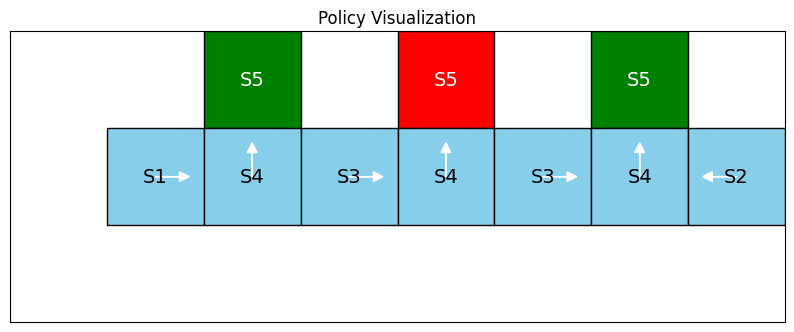

{'count': 103, 'policy': {'S1': 'Up', 'S2': 'Up', 'S3': 'Up', 'S4': 'Right', 'S5': 'Up'}}


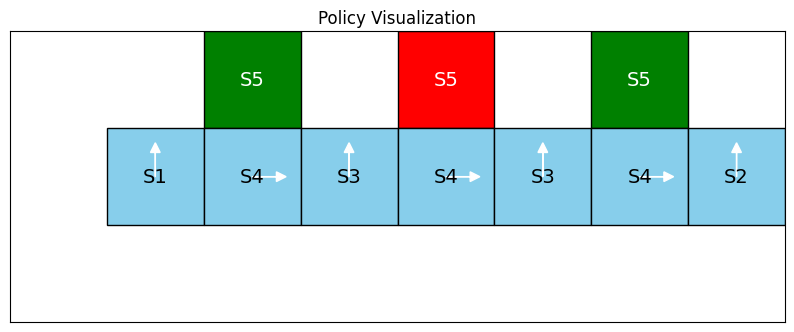

{'count': 219, 'policy': {'S1': 'Up', 'S2': 'Up', 'S3': 'Up', 'S4': 'Up', 'S5': 'Up'}}


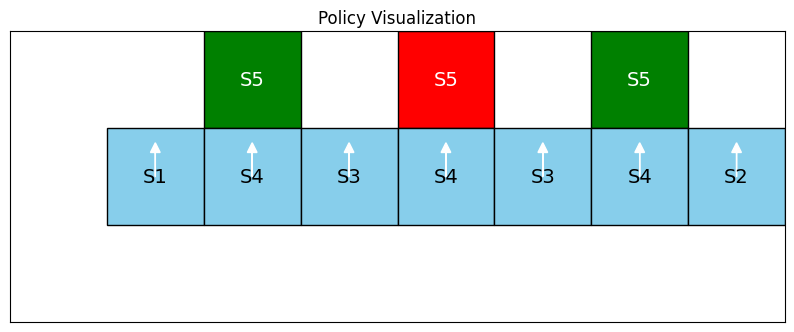

{'count': 231, 'policy': {'S1': 'Right', 'S2': 'Left', 'S3': 'Right', 'S4': 'Right', 'S5': 'Up'}}


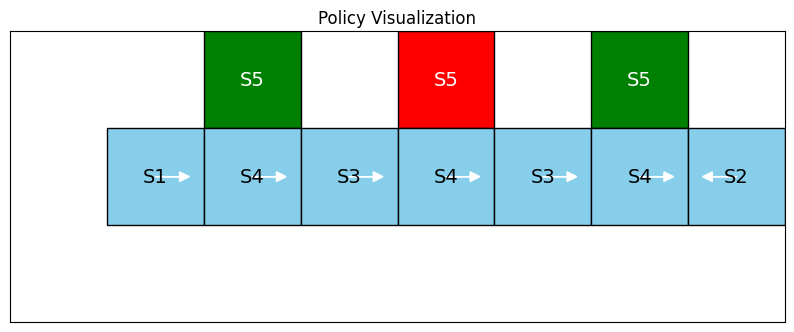

In [11]:
# vi_policy = ValuePolicy(mdp, vi_values)

for policy in vi_policies:
    print(vi_policies[policy])
    plot_custom_grid(vi_policies[policy]['policy'], state_positions, states, actions)

##### Policy iteration

In [12]:
iters = 1000
pi_policies = {}
pi_times = 0

for i in range(iters):
    time_start = time()
    _, policy = policy_iteration(mdp)
    time_end = time()

    policy_str = policy.__str__()

    if policy_str not in pi_policies:
        pi_policies[policy_str] = {'count': 1, 'policy': policy}
    else:
        pi_policies[policy_str]['count'] += 1

    pi_time = time_end - time_start
    pi_times += pi_time

pi_times /= iters

{'count': 89, 'policy': {'S1': 'Up', 'S2': 'Up', 'S3': 'Up', 'S4': 'Right', 'S5': 'Up'}}


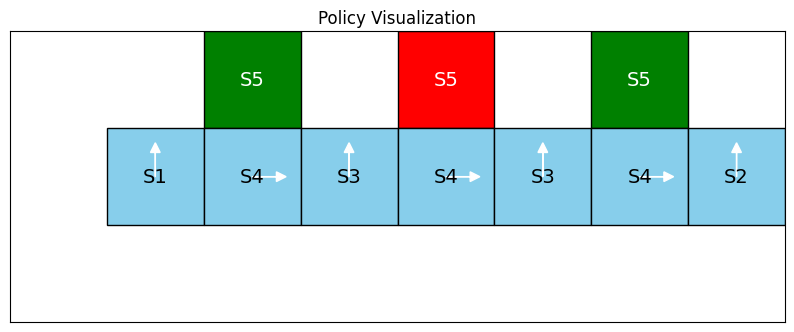

{'count': 298, 'policy': {'S1': 'Up', 'S2': 'Up', 'S3': 'Up', 'S4': 'Up', 'S5': 'Up'}}


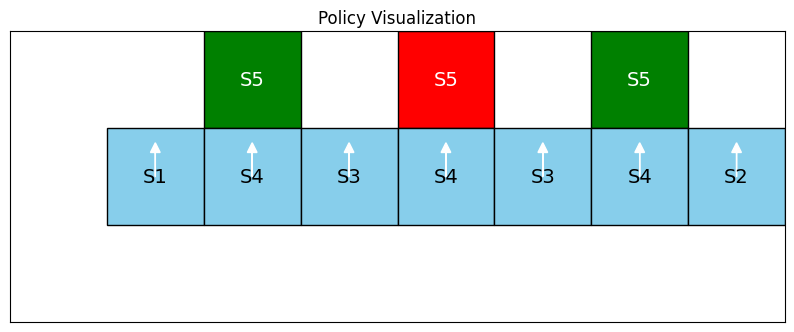

{'count': 613, 'policy': {'S1': 'Right', 'S2': 'Left', 'S3': 'Right', 'S4': 'Up', 'S5': 'Up'}}


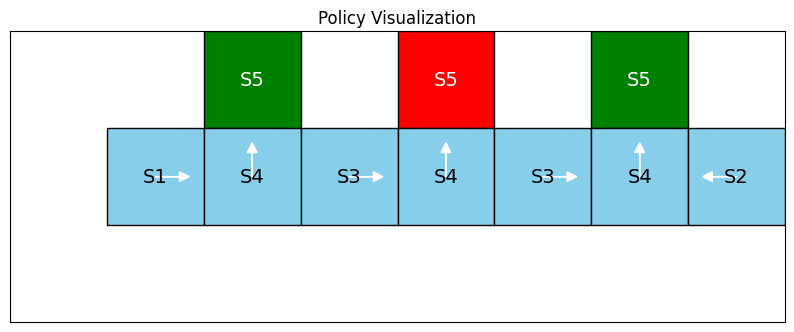

In [13]:
for policy in pi_policies:
    print(pi_policies[policy])
    plot_custom_grid(pi_policies[policy]['policy'], state_positions, states, actions)

##### Comparison of VI and PI

In [27]:
from tabulate import tabulate

# Assuming `states` is a list of all states and 
# `actions` is a list of possible actions.

headers = ["State"]

# Prepare the table data
table_data = []
for state in states:

    t = [state]
    for policy in vi_policies:
        action = vi_policies[policy]['policy'].get(state, 'N/A')
        vi_action = vi_policies[policy]['policy'].get(state, 'N/A')

        headers.append(f"VI ({vi_policies[policy]['count']})")
        t.append(action)

    for policy in pi_policies:
        action = pi_policies[policy]['policy'].get(state, 'N/A')
        vi_action = pi_policies[policy]['policy'].get(state, 'N/A')

        headers.append(f"PI ({pi_policies[policy]['count']})")
        t.append(action)

    table_data.append(t)

# Print the table
print(tabulate(table_data, headers=headers, tablefmt="grid"))

+---------+------------+------------+------------+------------+-----------+------------+------------+
| State   | VI (447)   | VI (103)   | VI (219)   | VI (231)   | PI (89)   | PI (298)   | PI (613)   |
+=========+============+============+============+============+===========+============+============+
| S1      | Right      | Up         | Up         | Right      | Up        | Up         | Right      |
+---------+------------+------------+------------+------------+-----------+------------+------------+
| S2      | Left       | Up         | Up         | Left       | Up        | Up         | Left       |
+---------+------------+------------+------------+------------+-----------+------------+------------+
| S3      | Right      | Up         | Up         | Right      | Up        | Up         | Right      |
+---------+------------+------------+------------+------------+-----------+------------+------------+
| S4      | Up         | Right      | Up         | Right      | Right     | Up    

In [26]:
print(f"Policy time: {pi_time}")
print(f"Value time: {vi_time}")

Policy time: 0.009132862091064453
Value time: 0.0


I ran VI and PI 1000 times, and tracked the number of occurrences of different policies for each algorithm. In VI, 4 different policies were found, whereas in PI, 3 unique policies were found. The time taken for each iteration has been provided, with PI having the duration around **0.00913 seconds** and VI's duration being shown as **0.0 seconds**, which is most likely a measurement limitation implying that its execution is very fast.

1. **VI** found **4 policies** across **1000 iterations**, highlighting some variability (showing it's less deterministic than PI). It's extremely fast but may lead to slightly more unstable policies as iteration counts increase.
   
2. **PI** found **3 consistent policies** across **1000 iterations**, showing its more stable and deterministic nature. However, it's marginally slower, taking an average of **0.00913 seconds** per run.

3. **Both algorithms effectively guide the actions toward the optimal policy that either maximizes reward (+1 for green cells) or minimizes punishment (-1 for red cells)**. In the given MDP, both methods tend to converge toward fairly similar optimal policies with minor differences in the earlier stages of convergence.

---

**Analysis of Results**

1. **VI Policies and Iterations**:

   - VI reached *4 different policies* across the 1000 iterations.
   - Policies are stable and consistent for each number of iterations:
     - In **447** iterations, the policy suggests: 
       - S1: Right, S2: Left, S3: Right, S4: Up, S5: Up
     - In **103** iterations:
       - S1: Up, S2: Up, S3: Up, S4: Right, S5: Up
     - In **219** iterations:
       - S1: Up, S2: Up, S3: Up, S4: Up, S5: Up
     - In **231** iterations:
       - S1: Right, S2: Left, S3: Right, S4: Right, S5: Up

2. **PI Policies and Iterations**:

   - PI reached *3 different policies* across the 1000 iterations.
   - PI seems to be more deterministic as compared to VI (fewer variations in policies):
     - In **89** iterations, the policy suggests: 
       - S1: Up, S2: Up, S3: Up, S4: Right, S5: Up
     - In **298** iterations:
       - S1: Up, S2: Left, S3: Up, S4: Right, S5: Up
     - In **613** iterations:
       - S1: Right, S2: Left, S3: Right, S4: Up, S5: Up

3. **Converged Policies**:
   
   Both methods yielded some similar policies, but overall **PI seemed to converge to fewer policies** than VI, especially with higher iteration counts.

   - **Convergence Insight**:
     - In both VI and PI, one noticeable policy shows directions for most of the states pointing 'Up,' except in cases where transitioning to a specific state (S4) is more beneficial (green or red rewards are involved).
     - The strategy to go 'Up' in all cases indicates that the agents are trying to either move toward the reward (green states) or avoid a penalty (red state) as quickly as possible.
   
4. **Comparing Policies for S1, S2, S3, S4, and S5**:
   
   - **S1 (Bottom-left):**
     - The decision fluctuates between 'Up' and 'Right,' indicating that it's sometimes better to reach S4 or go toward S2.
   
   - **S2 (Bottom-right):**
     - Both 'Left' and 'Up' actions appear across policies, showing indecisiveness between moving toward S1 or S4 for a neutral or a beneficial state.
   
   - **S3 and S4:**
     - The general consensus across most runs is to move 'Up,' suggesting these states are either trying to reach the green cell or avoid the red. Occasionally, 'Right' is favored for S4.
   
   - **S5 (Top-middle):**
     - Actions typically remain consistent toward 'Up,' driving towards the final green reward state. The consistency indicates clear optimal action.

---

**Time Analysis**

- On average, Policy Iteration (PI) took **0.00913 seconds**, while **VI took 0.0 seconds** (indicating very quick computation, possibly nanoseconds or not measurable within the tool's precision).
  
- **PI is slightly slower than VI**:
  - PI involves evaluating the value of a given policy and updating it until it converges, which may take longer as the policy is continuously compared.
  - VI speeds up the process by directly iterating over state values until convergence, without as much fine-tuning as PI.
  
- **VI completes in fewer iterations overall but with more variance in results**:
  - More policies were found in VI, which could suggest that it has more fluctuations in intermediate policy decisions before convergence.


#### b

Consider scenario 3 in a situation where the robot is aware of its location on the map. Once again, determine the optimal policy using the algorithms.

##### Utils

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Define the mapping of actions to directions
action_to_vector = {
    "Right": (1, 0),  # (dx, dy) for right
    "Left":  (-1, 0), # (dx, dy) for left
    "Up":    (0, 1),  # (dx, dy) for up
}

# Define grid positions for states
state_positions = {
    "S1": (0, 0), "S2": (1, 0), "S3": (2, 0), "S4": (3, 0), "S5": (4, 0), "S6": (5, 0), "S7": (6, 0),
    "T1": (1, 1), "T3": (3, 1), "T5": (5, 1)
}

# Create a function to plot the custom grid with actions
def plot_custom_grid(policy, state_positions, states, actions):
    fig, ax = plt.subplots(figsize=(10, 4))
    
    # Set bounds of the plot (limits)
    ax.set_xlim(-1, 7)
    ax.set_ylim(-1, 2)

    # Plot the top row terminal S5T states
    for state, position in state_positions.items():
        if "T" in state:
            # Color the middle terminal state red, others green
            color = 'red' if state == "T3" else 'green'
            ax.add_patch(plt.Rectangle(position, 1, 1, facecolor=color, edgecolor='black'))
            ax.text(position[0] + 0.5, position[1] + 0.5, "T", color='white', fontsize=14, ha='center', va='center')

    # Plot the bottom row regular states
    bottom_states = {"S1": (0, 0), "S2": (1, 0), "S3": (2, 0), "S4": (3, 0), "S5": (4, 0), "S6": (5, 0), "S7": (6, 0)}
    
    for state_key, position in bottom_states.items():
        state_name = state_key   # Handle state names (like "S4_2" -> "S4")
        ax.add_patch(plt.Rectangle(position, 1, 1, facecolor='skyblue', edgecolor='black'))
        ax.text(position[0] + 0.5, position[1] + 0.5, state_name, color='black', fontsize=14, ha='center', va='center')

        # Plot the action arrows according to the policy
        action = policy[state_name]
        dx, dy = action_to_vector[action]
        
        # Plot the action arrow for the state
        ax.arrow(position[0] + 0.5, position[1] + 0.5, 0.25 * dx, 0.25 * dy, head_width=0.1, head_length=0.1, fc='white', ec='white')

    # Remove ticks and format plot
    ax.set_xticks([])
    ax.set_yticks([])
    plt.title("Policy Visualization")
    plt.grid(False)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

##### MDP

In [29]:
class MDP:
    def __init__(self, states, actions, reward_func, transition_func, discount_factor):
        self.states = states
        self.actions = actions
        self.reward_func = reward_func
        self.transition_func = transition_func
        self.discount_factor = discount_factor

    def get_transitions(self, state, action):
        return self.transition_func[state][action]
    
    def get_reward(self, state, action, new_state):
        return self.reward_func[state][action][new_state]

    def get_states(self):
        return self.states

    def get_actions(self, state):
        return self.actions
    
    def get_discount_factor(self):
        return self.discount_factor

In [30]:
# Define the MDP components
states = ['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'T1', 'T3', 'T5'] 
actions = ['Up', 'Right', 'Left']
discount_factor = 0.9   # Lambda = 0.9

# Reward function R(s, a) -> `terminal (+1/-1)` and `0` elsewhere (unused)
reward_func = {
    'S1': {'Up': {'S1': 0}, 'Right': {'S2': 0}, 'Left': {'S1': 0}},       
    'S2': {'Up': {'T1': +1}, 'Right': {'S3': 0}, 'Left': {'S1': 0}},       
    'S3': {'Up': {'S3': 0}, 'Right': {'S4': 0}, 'Left': {'S2': 0}},       
    'S4': {'Up': {'T3': -1}, 'Right': {'S5': 0}, 'Left': {'S3': 0}},
    'S5': {'Up': {'S5': 0}, 'Right': {'S6': 0}, 'Left': {'S4': 0}},        
    'S6': {'Up': {'T5': +1}, 'Right': {'S7': 0}, 'Left': {'S5': 0}},
    'S7': {'Up': {'S7': 0}, 'Right': {'S7': 0}, 'Left': {'S6': 0}},
    'T1': {'Up': {'T1': 0}, 'Right': {'T1': 0}, 'Left': {'T1': 0}},
    'T3': {'Up': {'T3': 0}, 'Right': {'T3': 0}, 'Left': {'T3': 0}},
    'T5': {'Up': {'T5': 0}, 'Right': {'T5': 0}, 'Left': {'T5': 0}}
}

# Set the transition probability matrix P(s' | s, a)
# Transitions represented as P[s_current][a] = list of possible (s_next, prob).
transition_func = {
    'S1': {'Up': [('S1', 1)], 'Right': [('S2', 1)], 'Left': [('S1', 1)]},       
    'S2': {'Up': [('T1', 1)], 'Right': [('S3', 1)], 'Left': [('S1', 1)]},       
    'S3': {'Up': [('S3', 1)], 'Right': [('S4', 1)], 'Left': [('S2', 1)]},       
    'S4': {'Up': [('T3', 1)], 'Right': [('S5', 1)], 'Left': [('S3', 1)]},
    'S5': {'Up': [('S5', 1)], 'Right': [('S6', 1)], 'Left': [('S4', 1)]},        
    'S6': {'Up': [('T5', 1)], 'Right': [('S7', 1)], 'Left': [('S5', 1)]},
    'S7': {'Up': [('S7', 1)], 'Right': [('S7', 1)], 'Left': [('S6', 1)]},
    'T1': {'Up': [('T1', 1)], 'Right': [('T1', 1)], 'Left': [('T1', 1)]},
    'T3': {'Up': [('T3', 1)], 'Right': [('T3', 1)], 'Left': [('T3', 1)]},
    'T5': {'Up': [('T5', 1)], 'Right': [('T5', 1)], 'Left': [('T5', 1)]}
}

In [31]:
mdp = MDP(states, actions, reward_func, transition_func, discount_factor)

##### Value iteration

In [32]:
iters = 1000
vi_policies = {}
vi_times = 0

for i in range(iters):
    time_start = time()
    _, policy = value_iteration(mdp)
    time_end = time()

    policy_str = policy.__str__()

    if policy_str not in vi_policies:
        vi_policies[policy_str] = {'count': 1, 'policy': policy}
    else:
        vi_policies[policy_str]['count'] += 1

    vi_time = time_end - time_start
    vi_times += vi_time

vi_times /= iters

{'count': 1000, 'policy': {'S1': 'Right', 'S2': 'Up', 'S3': 'Left', 'S4': 'Right', 'S5': 'Right', 'S6': 'Up', 'S7': 'Left', 'T1': 'Up', 'T3': 'Up', 'T5': 'Up'}}


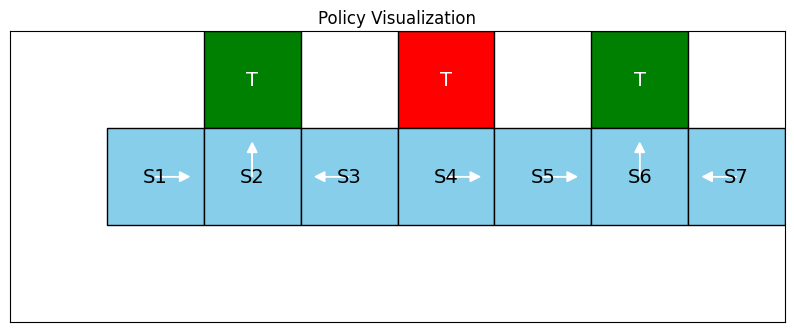

In [33]:
for policy in vi_policies:
    print(vi_policies[policy])
    plot_custom_grid(vi_policies[policy]['policy'], state_positions, states, actions)

##### Policy iteration

In [34]:
iters = 1000
pi_policies = {}
pi_times = 0

for i in range(iters):
    time_start = time()
    _, policy = policy_iteration(mdp)
    time_end = time()

    policy_str = policy.__str__()

    if policy_str not in pi_policies:
        pi_policies[policy_str] = {'count': 1, 'policy': policy}
    else:
        pi_policies[policy_str]['count'] += 1

    pi_time = time_end - time_start
    pi_times += pi_time

pi_times /= iters

{'count': 1000, 'policy': {'S1': 'Right', 'S2': 'Up', 'S3': 'Left', 'S4': 'Right', 'S5': 'Right', 'S6': 'Up', 'S7': 'Left', 'T1': 'Up', 'T3': 'Up', 'T5': 'Up'}}


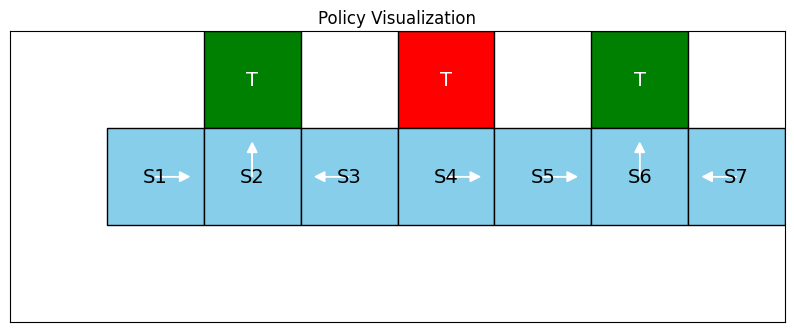

In [35]:
for policy in pi_policies:
    print(pi_policies[policy])
    plot_custom_grid(pi_policies[policy]['policy'], state_positions, states, actions)

##### Comparison of PI and VI

In [36]:
from tabulate import tabulate

# Assuming `states` is a list of all states and 
# `actions` is a list of possible actions.

headers = ["State"]

# Prepare the table data
table_data = []
for state in states:

    t = [state]
    for policy in vi_policies:
        action = vi_policies[policy]['policy'].get(state, 'N/A')
        vi_action = vi_policies[policy]['policy'].get(state, 'N/A')

        headers.append(f"VI ({vi_policies[policy]['count']})")
        t.append(action)

    for policy in pi_policies:
        action = pi_policies[policy]['policy'].get(state, 'N/A')
        vi_action = pi_policies[policy]['policy'].get(state, 'N/A')

        headers.append(f"PI ({pi_policies[policy]['count']})")
        t.append(action)

    table_data.append(t)

# Print the table
print(tabulate(table_data, headers=headers, tablefmt="grid"))

+---------+-------------+-------------+
| State   | VI (1000)   | PI (1000)   |
+=========+=============+=============+
| S1      | Right       | Right       |
+---------+-------------+-------------+
| S2      | Up          | Up          |
+---------+-------------+-------------+
| S3      | Left        | Left        |
+---------+-------------+-------------+
| S4      | Right       | Right       |
+---------+-------------+-------------+
| S5      | Right       | Right       |
+---------+-------------+-------------+
| S6      | Up          | Up          |
+---------+-------------+-------------+
| S7      | Left        | Left        |
+---------+-------------+-------------+
| T1      | Up          | Up          |
+---------+-------------+-------------+
| T3      | Up          | Up          |
+---------+-------------+-------------+
| T5      | Up          | Up          |
+---------+-------------+-------------+


In [37]:
print(f"Policy time: {pi_time}")
print(f"Value time: {vi_time}")

Policy time: 0.0
Value time: 0.0


Similarly, I ran both **Value Iteration (VI)** and **Policy Iteration (PI)** for **1000 iterations** each, and reported consistent policies for both methods. The time data for both methods (value and policy) was recorded as **0.0 seconds**, which indicates these operations concluded very quickly.

1. **Both VI and PI yield the same optimal policy**, meaning agents should navigate towards green cells (T1 and T5), avoid the red cell (T3), and optimize rewards.
   
2. **Time measurements** indicate that both VI and PI completed the tasks rapidly (near-zero duration) due to the simplified nature of the state transitions.

3. The policies determined by VI and PI show logical and optimal movements, driven by transitioning away from penalties and toward reward-based outcomes. This reflects efficient navigation, perfectly aligning with the given rewards and penalties in the MDP.

---

**Policy Analysis for Value Iteration (VI) and Policy Iteration (PI)**

From the provided table and analysis, both **VI (1000 iterations)** and **PI (1000 iterations)** resulted in **identical policies** for all states (S1 to S7, and terminal states T1, T3, T5).

**Determined Policies for Each State (for both VI and PI):**

1. **S1**:
   - Action: `Right`
   - Moving right seems to be the best action for S1 to reach a beneficial state.
   
2. **S2**:
   - Action: `Up`
   - Moving up from S2 likely leads directly toward the green state T1, which offers a reward of +1.
   
3. **S3**:
   - Action: `Left`
   - This action avoids moving right towards T3 (the red state with a -1 penalty). Hence, moving left is a safer strategy.
   
4. **S4**:
   - Action: `Right`
   - Moving right seems to be best for S4, likely leading toward higher-valued states (like T5) or avoiding proximity to penalties.
   
5. **S5**:
   - Action: `Right`
   - Moving right from S5 probably leads to T5 (the green state on the right side), which gives a +1 reward.
   
6. **S6**:
   - Action: `Up`
   - Moving up from S6 likely leads directly to T5, a green state with a +1 reward.

7. **S7**:
   - Action: `Left`
   - Moving left is optimal in this case to avoid harm from T3 (the red cell) and lead towards more neutral or beneficial parts of the map.

**Evaluation of Terminal States**

- **T1 (Green) and T5 (Green)**:
  - Action: `Up`
  - Since these terminal states represent positive outcomes (+1 reward), the agent can't perform any further actions.

- **T3 (Red)**:
  - Action: `Up`
  - No further transitions occur after reaching a terminal state. In this case, the agent incurs a penalty of -1 after moving into T3.

**Policy Consistency Between VI and PI**

Since the policies are **identical under both algorithms**, it shows strong convergence to the optimal policy for this specific MDP. Here's what we can infer:

1. **Policy Convergence**:
   - Both methods converge to the same optimal policy after 1000 iterations. While **VI** typically updates state values iteratively and **PI** iterates over entire policies, both approaches guide actions toward similar goals: avoiding penalties and obtaining rewards.

2. **Optimality**:
   - The policies reflect intelligent movement strategies — the agent avoids the red state (T3, penalty) and moves toward either neutral or positive paths (green cells: T1, T5).
   - States like **S3** and **S7** demonstrate how the agent prefers to move away from potential penalties by strategically moving left.

---

**Time Analysis**

- **Policy Timing**:
  - Both **Policy Iteration (PI)** and **Value Iteration (VI)** showed a timing of **0.0 seconds** in the provided results. This suggests the operations were extremely fast and likely executed in a minimal number of time measurements. Given the simplicity of the MDP, this is expected.

## Problem 4

In this question, we examine the effect of episode length (Horizon) on the agent’s policy. Consider a robot that is tasked with managing stock shares. (Assume this problem can be represented as an MDP.)

Let $ s $ represent the number of shares the robot currently has (an integer always between [0,10]). At each moment, the robot has two options: to sell (if possible, $ s $ decreases by one unit) or to buy (if possible, $ s $ increases by one unit).

- If $ s > 0 $ and the agent sells, it receives a reward of +1 for the sale, and the stock level changes to $ s - 1 $. If $ s = 0 $, nothing happens.
- If $ s < 9 $ and the agent buys, it receives no reward, and the stock level changes to $ s + 1 $.
- The stock owner wants the inventory to be fully stocked at the end of the day; therefore, if the stock level reaches the maximum value of $ s = 10 $, the agent receives a reward of +100.
- The state $ s = 10 $ is also a terminal state, and the problem ends if it is reached.

The reward function, denoted by $ r(s, a, s') $, is summarized as follows:

- $ r(s, \text{sell}, s - 1) = 1 $ for $ s > 0 $
- $ r(0, \text{sell}, 0) = 0 $
- $ r(s, \text{buy}, s + 1) = 0 $ for $ s < 9 $
- $ r(9, \text{buy}, 10) = 100 $, indicating that moving from $ s = 9 $ to $ s = 10 $ gives a reward of +100, reaching the maximum stock level.

It is assumed that the stock level always starts from $ s = 3 $ at the beginning of the day. We will examine how the agent’s optimal policy changes by setting a limited horizon $H$ for the problem. Recall that the horizon $ H $ refers to a limit on the number of time steps in which the agent can interact with the MDP before the episode ends, regardless of whether a terminal state has been reached. We will analyze the characteristics of the optimal policy (the policy that maximizes the episode’s reward) as the horizon $ H $ changes. (For the finite horizon, the discount factor is $ \gamma = 1 $).

![pics/P4.png](pics/P4.png)

For example, assume $ H = 4 $. The agent can sell for three steps, moving from $ s = 3 $ to $ s = 2 $, then $ s = 1 $, and finally $ s = 0 $, receiving rewards of +1, +1, and +1 for each sell action. In the fourth step, the inventory is empty, so it can either sell or buy, but it will not receive any reward in either case. Then, the problem ends due to the time limit.

### a 
Starting from the initial state $ s = 3 $, is it possible to choose a value of $ H $ such that the optimal policy includes both buying and selling steps during the execution? Explain your answer.

Yes, let’s explore $H = 5$ in detail:

**Setting $H = 5$:**

We begin at $s = 3$ and examine a scenario with 3 sells, followed by 1 buy and then 1 sell:

- **First step (s = 3)**: Sell, move to $s = 2$, and receive a reward of +1.
- **Second step (s = 2)**: Sell, move to $s = 1$, and receive a reward of +1.
- **Third step (s = 1)**: Sell, move to $s = 0$, and receive a reward of +1.
- **Fourth step (s = 0)**: Since there are no more shares to sell, the optimal action is to buy. Buy, move to $s = 1$, and receive no reward.
- **Fifth step (s = 1)**: Sell, return to $s = 0$, and receive a reward of +1.

In this scenario, with a horizon $H = 5$, we obtain 4 units of reward: 1 unit from each of the 4 sell actions. The agent first sells down to $s = 0$, buys back to $s = 1$, and finally sells again.

This sequence contains both **buying** and **selling** steps, thus confirming that it is possible for the agent's optimal policy to include both actions if the horizon $H$ is set to 5.

---

#### **General Analysis of $H$ and Buying/Selling**

- **For $H \leq 4$**:
  At this point, the agent **only sells** to receive immediate rewards without any buying actions, because there isn't enough time or benefit from trying to buy stocks. The reward for selling is immediate, whereas buying does not provide any immediate reward. 

  - For example, with **$H = 4$**:
    - The optimal policy involves the agent selling for the first three steps, moving from $s = 3$ to $s = 0$.
    - At the fourth step (at $s = 0$), the robot can either sell again (which would yield no reward) or buy, but the point is that **the optimal policy would not necessarily contain any buy** since the buy action doesn't lead to an immediate benefit and there's no sufficient time left to capitalize on it. So, you will often just see 3 sells and perhaps some arbitrary choice in the 4th.
  
- **For $H = 5$**:
  With $H = 5$, the agent can start selling, just like $H = 4$, but might add **a single buy step** at the fourth step (after the third sale).

  - Optimal policy for $H = 5$:
    - The first three actions are sells: $s = 3 \to 2 \to 1 \to 0$ with rewards of +1 for each sell.
    - In the fourth step, the agent might buy (because there’s no benefit in selling, as $s = 0$).
    - Finally, selling again in the fifth step yields another reward of +1.
  
  Thus, $H = 5$ allows for a mixture of **1 buy step and 4 sells**, leading to maximal reward accumulation.

- **For $H = 6$**:
  $H = 6$ is similar to $H = 5$. The agent can follow a similar strategy, where first they sell, then buy at one point, and finally sell again to get a reward.

  - Optimal policy for $H = 6$:
    - The agent might sell for three steps (moving from $s = 3 \to s = 0$).
    - Then the agent buys (e.g., at step 4), moves to $s = 1$, sells it back again to stay within the horizon.
    - Additional sells/buys in a similar cycle could lead to a total return of 4-5, depending on the steps chosen.

  Therefore, $H = 6$ contains a **mixture of several buys and sells** where the agent maximizes reward while handling the $H = 6$ steps.

- **For $H = 7$**:
    
  At $H = 7$, the agent no longer sells to maximize rewards. Instead, the optimal policy will switch to buying actions aimed at maximizing the final large reward of 100 at $s = 10$. Since the starting state is $s = 3$, it can take up to 7 steps:
    
  - The agent will **only buy** to increase the stock from $s = 3 \to s = 10$.
  - By the seventh step, the robot will buy enough shares (moving from $s = 3 \to s = 10$) and reach the terminal state at $s = 10$, where it receives the reward of 100.

  Thus, for $H = 7$, **buying only** guarantees the large reward at the terminal state.

- **For $H = 8$**:
    
  The situation is quite similar to $H = 7$. Even though the agent has 8 steps, the optimal trajectory is still to buy until it reaches the maximum stock level of $s = 10$.

  - If the agent spends any actions selling (for small immediate rewards), it sacrifices the future reward of 100 from reaching $s = 10$, so selling is suboptimal.
  - Therefore, the **only optimal policy** in this case is to **buy** in order to maximize future rewards.

  The agent will still follow a pure-buy policy to reach $s = 10$ and get rewarded with 100.

- **For $H \geq 9$**:
    
  For horizons $H \geq 9$, the agent has enough time to maximize the reward not just by stockpiling all the way up to $s = 10$, but also by mixing in intermittent sells to gain additional rewards along the way, before ultimately ensuring it ends at $s = 10$.

  - The agent can use $s \to s - 1$ transitions (selling) to obtain immediate rewards (e.g., +1) at several points and then buy back the shares in order to reach $s = 10$.
  - The idea is to balance between immediate rewards from selling shares and the future reward of 100 for max stock level $s = 10$.

  For example, for $H = 9$, the agent can:
  - Sell for a couple of actions to gain small immediate rewards, then **switch to buying to ensure that the final state is $s = 10$**, and maximize the larger future reward.

  For **$H \geq 9$**, the optimal policy is a **mixture of sells and buys** to balance immediate rewards and ensure reaching $s = 10$.



### b
Starting from the initial state $ s = 3 $, for what values of $ H $ does the optimal policy lead to a fully stocked inventory? In other words, provide a range for $ H $.

*Note 1:* We consider the inventory fully stocked when the buy action is chosen in state $ s = 9 $, causing a transition to $ s = 10 $. This includes the last time step in the horizon as well.

*Note 2:* By performing only buy actions, the agent can reach $ s = 10 $ from $ s = 3 $ in $ H = 7 $ steps.

The answer is $7 \leq H$. Let's see why:

#### $H \leq 6$

- The agent will prefer selling rather than buying, as reaching $s = 10$ is impossible within 6 steps. The agent will maximize the immediate rewards from selling, and the inventory will not become fully stocked.

#### $H = 7$

- Starting at $s = 3$, if $H = 7$, by **only buying**, the agent can reach $s = 10$ on the last step:
  $$s = 3 \to 4 \to 5 \to 6 \to 7 \to 8 \to 9 \to 10.$$
  
  Reaching $s = 10$ gives the agent a reward of +100 in the final step. This is the maximum possible reward for this horizon because selling earlier for a reward of +1 per sale sacrifices the large reward of +100 from reaching $s = 10$. The optimal policy in this case is to **always buy** and reach $s = 10$.

Thus, **for $H = 7$**, the optimal policy leads to a fully stocked inventory, since the agent sacrifices no time for selling and focuses on accumulating the large terminal reward.

#### $H = 8$

- With $H = 8$, the agent can reach $s = 10$ by **only buying**:

  $$s = 3 \to 4 \to 5 \to 6 \to 7 \to 8 \to 9 \to 10.$$
  
  Like in the case of $H = 7$, the agent will receive the large reward of +100 upon reaching $s = 10$. There is one extra step after reaching $s = 10$, but since reaching $s = 10$ ends the episode, no further actions are possible once the maximum state is reached.

  If the agent spends any time selling earlier, they will not collect the large reward of +100 from reaching $s = 10$. Therefore, the optimal policy for $H = 8$ is still to **buy exclusively** and reach $s = 10$, maximizing the final reward.

Thus, **for $H = 8$**, the optimal policy leads to fully stocking the inventory. The agent once again only buys to reach $s = 10$ and get the large reward.

#### $H = 9$ and beyond

- For $H \geq 9$, the agent has even more time. The important decision now is to determine whether earning small rewards by selling before reaching $s = 10$ can provide better total rewards than simply reaching $s = 10$ for the big reward of +100.

- Since the reward from reaching $s = 10$ is **so large** (+100), the optimal strategy will still involve **reaching $s = 10$** within the time limit.

  However, the agent might choose to sell once or twice **early** to gather a small immediate reward (e.g., selling at $s = 3 \to s = 2$) and then buy back to ensure it still reaches $s = 10$. As long as reaching $s = 10$ is still feasible, the agent can mix buying and selling to maximize the total reward.

  One possible policy for $H = 9$ is to sell for 1 step (gaining +1 reward), and then continue buying towards $s = 10$, ensuring that the agent still gets the major reward of +100.

Thus, **for $H \geq 9$**, the optimal policy may include a mix of **some early selling** for immediate rewards followed by **buying to reach $s = 10$**. The agent still values reaching the fully stocked inventory because of the large +100 reward. This means the inventory ends fully stocked, but the agent makes a few sales en route to $s = 10$.

### c
Now, consider the infinite-horizon setting with a discount factor $ \gamma $. In other words, there is no time limit, and the problem only ends if a terminal state is reached. Suppose $ \gamma = 0 $; what action does the optimal policy take when $ s = 3 $? What action does the optimal policy take when $ s = 9 $?

Since $\gamma = 0$, the agent only cares about rewards in the current step and ignores all possible future outcomes. So, **at $s = 3$**, the best action is to **sell** a share because this provides an immediate reward of +1. additionally, **at $s = 9$** the best action is to **buy** a share to reach $s = 10$, which gives the large immediate reward of +100.

#### What does $\gamma$ = 0 mean?

The discount factor $\gamma$ tells us how the agent values **future rewards**. If $\gamma = 0$, the agent **does not care about future rewards at all**; it only cares about the **immediate rewards**. This means the agent will choose actions that maximize the current step's reward without considering what might happen next.

In this scenario, with $\gamma = 0$, **only the immediate reward matters** for the agent at every step. The agent isn't concerned about long-term outcomes, such as reaching the fully stocked inventory $s = 10$ and receiving the +100 reward at the end. Instead, it focuses solely on the action that gives the highest reward in the current step.

#### What happens at $s = 3$?
At $s = 3$, the agent has two options:
1. **Sell**: Selling one share will give the agent an immediate reward of **+1** and move it to state $s = 2$.
2. **Buy**: Buying one share will give the agent **0 immediate reward** and move it to state $s = 4$.

Since $\gamma = 0$, the agent only cares about **immediate reward**, not future rewards. Therefore, the agent will choose the action that gives the best **immediate** return. **Selling** at $s = 3$ provides an immediate reward of **+1**, while buying provides **0 immediate reward**.

Thus, **the optimal action at $s = 3$** is to **sell** a share in order to get the immediate reward of +1.

#### What happens at $s = 9$?
Similarly, at $s = 9$, the agent has two options:
1. **Sell**: Selling one share will give the agent an immediate reward of **+1** and move it to state $s = 8$.
2. **Buy**: Buying one share will move the agent to state $s = 10$, which is the terminal state, and will immediately give a reward of **+100**.

Since $\gamma = 0$ means the agent only cares about **immediate reward**, the choice here is clear: **Buying** in $s = 9$ leads to an immediate reward of **+100**, which is much higher than the alternative of **+1** received from selling.

Thus, **the optimal action at $s = 9$** is to **buy** the last share, transitioning to $s = 10$ and earning the large immediate reward of +100.

### d
In the infinite-horizon setting with a discount factor $ \gamma $, is it possible to choose a constant $ \gamma \in (0, 1] $ such that the optimal policy, starting from $ s = 3 $, never fully stocks the inventory? If so, find a range of $ \gamma $ that meets this condition.

We consider two policies:

1. **Policy for filling the inventory (buying until $s = 10$)**:
    - Starting from $s = 3$, the agent buys until it reaches $s = 10$ to get the large reward of +100.
    - The cumulative discounted reward for reaching $s = 10$ is:
      $$G_{\text{stock}} = 100 \cdot \gamma^6$$
    - This is because the reward of +100 is received after 7 steps of buying (zero rewards along the way), so the total gain is discounted by $\gamma^6$.

2. **Policy for not filling the inventory (selling first, then alternating between buying and selling)**:
    - In this case, the agent first sells down to $s = 0$, collects small rewards of +1, and then alternates between buying and selling to collect additional rewards.
    - The cumulative discounted reward for selling and not restocking the inventory is:
      $$G_{\text{no\_stock}} = 1 + \gamma + \gamma^2 + 0 + \gamma^4 + 0 + \gamma^6 + \cdots$$
    - The important thing to notice here is that rewards are collected every other step, and this forms a geometric series. Therefore, using the summation formula for a geometric series, the total reward from selling and alternating is:
      $$G_{\text{no\_stock}} = \gamma + \frac{1}{1 - \gamma^2}$$

#### Condition for avoiding fully stocking the inventory:
We want to find the values of $\gamma$ such that the reward from not stocking the inventory is larger than the reward from fully stocking the inventory:
$$G_{\text{no\_stock}} > G_{\text{stock}}$$
This results in the inequality:
$$\gamma + \frac{1}{1 - \gamma^2} > 100 \cdot \gamma^6$$
Multiply both sides by $(1 - \gamma^2)$ to eliminate the denominator:
$$(\gamma - \gamma^3) + 1 > 100 \cdot \gamma^6 \cdot (1 - \gamma^2)$$
Next, expand the terms:
$$1 - \gamma^3 + \gamma > 100 \cdot \gamma^6 - 100 \cdot \gamma^8$$
Rearrange the terms to move everything to one side:
$$100 \cdot \gamma^8 - 100 \cdot \gamma^6 - \gamma^3 + \gamma + 1 > 0$$
This is the expression we need to solve.

#### Solving the inequality:

![pics/P4d.png](pics/P4d.png)

The graph shows the function:
$$f(x) = 100 \cdot x^8 - 100 \cdot x^6 - x^3 + x + 1$$
By plotting the graph (as shown in the image), we find that the root of the inequality is approximately:
$$\gamma \approx 0.51554$$
Thus, the range of $\gamma$ such that the optimal policy **never fully stocks the inventory** is:
$$\gamma \in (0, 0.51554)$$

### Implementation

#### a

Based on your answer to part (a) above, choose values of $H$ such that, after obtaining the optimal policy using the VI and PI algorithms, the optimal policy exhibits the following characteristics:  
- The optimal policy only buys.  
- The optimal policy only sells.  
- The optimal policy performs both buying and selling.  

##### MDP

In [1]:
class MDP:
    def __init__(self, states, actions, reward_func, transition_func, discount_factor):
        self.states = states
        self.actions = actions
        self.reward_func = reward_func
        self.transition_func = transition_func
        self.discount_factor = discount_factor

    def get_transitions(self, state, action):
        return self.transition_func[state][action]
    
    def get_reward(self, state, action, new_state):
        return self.reward_func[state][action][new_state]

    def get_states(self):
        return self.states

    def get_actions(self, state):
        return self.actions
    
    def get_discount_factor(self):
        return self.discount_factor
    
    # Generate a random episode based on the current ε-greedy policy
    def generate_episode(self, start_state, policy, epsilon):
        episode = []
        state = start_state

        while state != 'S10':  # Until we reach the terminal state S10
            action = self.get_action_for_state_epsilon_greedy(state, policy, epsilon)
            transitions = self.get_transitions(state, action)
            new_state, prob = random.choices(transitions, [prob for _, prob in transitions])[0]
            reward = self.get_reward(state, action, new_state)
            episode.append((state, action, reward, new_state))
            state = new_state
        
        return episode

In [42]:
states = ['S0', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'S10']
actions = ['buy', 'sell']
discount_factor = 0.9   # Lambda = 0.9

# Reward function R(s, a) -> `terminal (+1/-1)` and `0` elsewhere
reward_func = {
    'S0': {'buy': {'S1': 0}, 'sell': {'S0': 0}},
    'S1': {'buy': {'S2': 0}, 'sell': {'S0': 1}},
    'S2': {'buy': {'S3': 0}, 'sell': {'S1': 1}},
    'S3': {'buy': {'S4': 0}, 'sell': {'S2': 1}},
    'S4': {'buy': {'S5': 0}, 'sell': {'S3': 1}},
    'S5': {'buy': {'S6': 0}, 'sell': {'S4': 1}},
    'S6': {'buy': {'S7': 0}, 'sell': {'S5': 1}},
    'S7': {'buy': {'S8': 0}, 'sell': {'S6': 1}},
    'S8': {'buy': {'S9': 0}, 'sell': {'S7': 1}},
    'S9': {'buy': {'S10': 100}, 'sell': {'S8': 1}},
    'S10': {'buy': {'S10': 0}, 'sell': {'S10': 0}}
}

# Set the transition probability matrix P(s' | s, a)
# Transitions represented as P[s_current][a] = list of possible (s_next, prob).
transition_func = {
    'S0': {'buy': [('S1', 1)], 'sell': [('S0', 1)]},
    'S1': {'buy': [('S2', 1)], 'sell': [('S0', 1)]},
    'S2': {'buy': [('S3', 1)], 'sell': [('S1', 1)]},
    'S3': {'buy': [('S4', 1)], 'sell': [('S2', 1)]},
    'S4': {'buy': [('S5', 1)], 'sell': [('S3', 1)]},
    'S5': {'buy': [('S6', 1)], 'sell': [('S4', 1)]},
    'S6': {'buy': [('S7', 1)], 'sell': [('S5', 1)]},
    'S7': {'buy': [('S8', 1)], 'sell': [('S6', 1)]},
    'S8': {'buy': [('S9', 1)], 'sell': [('S7', 1)]},
    'S9': {'buy': [('S10', 1)], 'sell': [('S8', 1)]},
    'S10': {'buy': [('S10', 1)], 'sell': [('S10', 1)]}
}

# Starting state is S3
start_state = 'S3'

In [43]:
mdp = MDP(states, actions, reward_func, transition_func, discount_factor)

##### Finite VI

In [46]:
def finite_horizon_value_iteration(mdp, T, epsilon=1e-5):
    states = mdp.get_states()
    actions = mdp.actions  # Same actions for all states
    
    # Initialize value functions for each time step t (V_t(s))
    V = {t: {s: 0 for s in states} for t in range(T + 1)}  # V_T = 0 is terminal condition
    policy = {t: {s: None for s in states} for t in range(T + 1)}  # Initialize policy for each time t

    # Step backwards from t = T-1 to t = 0
    for t in range(T - 1, -1, -1):

        while True:
            delta = 0
            new_V = V[t].copy()
            
            for state in states:
                max_value = max(
                    sum(prob * (mdp.get_reward(state, action, next_state) + V[t+1][next_state])
                        for next_state, prob in mdp.get_transitions(state, action))
                    for action in actions
                )
                new_V[state] = max_value
                delta = max(delta, abs(V[t][state] - new_V[state]))
            
            V[t] = new_V
            
            # Check for convergence
            if delta < epsilon:
                break

        for state in states:
            action_values = {}
            for action in actions:
                action_values[action] = sum(
                    prob * (mdp.get_reward(state, action, next_state) + V[t+1][next_state])
                    for next_state, prob in mdp.get_transitions(state, action)
                )
            policy[t][state] = max(action_values, key=action_values.get)
    
    return V, policy  # Return value functions at different time steps

**Input and Initialization:**

1. **Input Parameters:**
   * `mdp`: the Markov Decision Process for which we are calculating the value functions and policy. It assumes that the MDP provides methods like:
     - `mdp.get_states()` to get the list of all possible states.
     - `mdp.get_transitions(state, action)` to get the transition probabilities (i.e., the probability of moving to each possible next-state after taking a specific action from a current state).
     - `mdp.get_reward(state, action, next_state)` to get the immediate reward for a transition from `state` to `next_state` after taking `action`.
   * `T`: Length of the time horizon (i.e., the number of decision steps). The process spans from $t = 0$ to $t = T-1$.
   * `epsilon`: A parameter controlling the convergence threshold for the algorithm (default value of `epsilon = 1e-5`).

2. **Initialization:**
   * `states`: A list of all possible states in the MDP retrieved using `mdp.get_states()`.
   * `actions`: A list of all actions (the code assumes that the MDP has the same actions for all states).
   * `V`: A dictionary that will store the **value function** $V_t[s]$ at each time step $t$ for each state $s$. It is initialized with all values at 0 initially (Note: $V_T[s] = 0$ is defined as the terminal condition because beyond time horizon $T$ there is no reward to be collected).
   
     - **Value function $V_t(s)$:** Represents the maximum expected cumulative reward from state $s$ at time-step $t$, assuming optimal decisions are made afterward.
   
   * `policy`: A dictionary that will store the **optimal policy** for each state $s$ at each time $t$ (initially set to `None` for all state-ath time-step pairs).
     
     - **Policy $\pi_t(s)$:** Represents the optimal action to take in state $s$ at time-step $t$ to maximize expected rewards for the future.

**Backwards Iteration over Time Steps:**

The algorithm proceeds **backwards** starting from time-step $t = T-1$ down to $t = 0$, towards the beginning of the planning horizon. For each time step $t$:

1. **Value Iteration at Time Step $t$:**

   For each time step $t$, the algorithm updates the current value function estimates $V_t(s)$ for each state $s$, considering the rewards and the continued value from the future (referred to as $V_{t+1}(s)$) resulting from optimal policies. The value update for each state happens iteratively until convergence.

   **Steps for each state $s$ in the time-step**:
   - For each state `s`, try all possible actions $a$ from this state.
   - For each action $a$, calculate the cumulative expected value:
     - Look at all possible next states $s'$ and their transition probabilities given by $\text{prob}(s' \mid s, a)$.
     - Compute the sum of the expected future rewards from taking action $a$ in state $s$,
       - This is computed as:
         $$\text{expected value} = \sum_{s'} \text{prob}(s' | s, a) \cdot \left[ \text{reward}(s, a, s') + V_{t+1}(s') \right]$$
       - The reward depends on the current state $s$, action $a$, and resulting next state $s'$, while $V_{t+1}(s')$ reflects the future value from that next state $s'$ at the next time-step $t+1$.
   - Choose the action that maximizes this expected value for the state.

   - After exploring all actions, set the new value of $V_t(s)$ to the best (maximized) value and update the policy $\pi_t(s)$ to the action that gives this best value. This iteration continues for the current time-step $t$ until the value function $V_t$ converges for all states (i.e., changes are lower than `epsilon`).

2. **Policy Extraction:**
   - Once the value function $V_t$ has converged, the resulting policy $\pi_t(s)$ is extracted by considering the optimal action for each state $s$. For each state, iterate through possible actions and look for the one with the highest expected value (this is stored in the `policy` dictionary).

**Breaking the Process:**

The inner while-loop runs continuously during each time-step until the value function stabilizes for that time step. The process ends if the largest difference between successive value updates (tracked by `delta`) is smaller than the convergence threshold $\epsilon$. This is a heuristic to ensure that the value function has sufficiently converged, meaning further updates will not significantly improve the result.

**Output:**

At the end of the algorithm:
- **`V`** will contain the final value functions for all states at each time step (from $t = 0$ to $t = T$).
- **`policy`** will contain the optimal action to take for each state at each time step (this yields the optimal policy sequence).


##### Finite PI

In [58]:
def finite_horizon_policy_iteration(mdp, T, epsilon=1e-5):
    states = mdp.get_states()
    actions = mdp.actions  # Same actions for all states
    
    # Initialize value functions for each time step t (V_t(s))
    V = {t: {s: 0 for s in states} for t in range(T + 1)}  # V_T = 0 is terminal condition
    policy = {t: {s: actions[0] for s in states} for t in range(T + 1)}  # Initialize policy for each time t

    def policy_evaluation(policy, V1, V2):
        """
        Evaluate the given policy by solving V(s) = sum over next states[T(s, pi(s), s') * (R(s, pi(s), s') + γ * V(s'))].
        The function performs iterative evaluation until V converges.
        """
        while True:
            delta = 0
            new_V = V1.copy()
            
            for state in states:
                action = policy[state]
                new_V[state] = sum(
                    prob * (mdp.get_reward(state, action, next_state) + V2[next_state])
                    for next_state, prob in mdp.get_transitions(state, action)
                )
                delta = max(delta, abs(V1[state] - new_V[state]))
            
            V1 = new_V
            
            # Check for convergence
            if delta < epsilon:
                break
        
        return V1
    
    # Step backwards from t = T-1 to t = 0
    for t in range(T - 1, -1, -1):

        while True:
            # Step 3: Policy Evaluation -> Compute V given current policy
            V[t] = policy_evaluation(policy[t], V[t], V[t+1])
            
            policy_stable = True
            
            # Step 4: Policy Improvement -> Greedily improve the policy
            for state in states:
                # Find the best action according to the current value function V
                old_action = policy[t][state]
                action_values = {}
                
                for action in actions:
                    action_values[action] = sum(
                        prob * (mdp.get_reward(state, action, next_state) + V[t+1][next_state])
                        for next_state, prob in mdp.get_transitions(state, action)
                    )
                
                # Choose the action that gives maximum value
                best_action = max(action_values, key=action_values.get)
                policy[t][state] = best_action
                
                # If the policy did change, we're not yet stable
                if old_action != best_action:
                    policy_stable = False
            
            # Step 5: Check if the policy is stable and terminate if it is
            if policy_stable:
                break
    
    return V, policy  # Return value functions at different time steps

**Initialization:**

1. **Input Parameters:**
   * `mdp`: The Markov decision process, which provides methods like:
     - `mdp.get_states()` to get the list of all possible states.
     - `mdp.get_transitions(state, action)` to get the transition probabilities for a given state-action pair.
     - `mdp.get_reward(state, action, next_state)` to get the reward for transitioning from a state to a next state after taking an action.
   * `T`: A finite horizon, meaning there is a limited number $T$ of decision time steps. The goal is to maximize the cumulative reward over this fixed period.
   * `epsilon`: A threshold for convergence, i.e., how small the change in the value function must be for the algorithm to decide that it has converged (default set to $10^{-5}$).

2. **Initialization of Variables:**
   - `states`: The list of states in the MDP is retrieved using `mdp.get_states()`.
   - `actions`: Actions available in the MDP, assumed to be identical for all states as `mdp.actions`.
   - `V`: A dictionary representing the **value function** $V_t(s)$ for each state $s$ and time step $t$. It's initialized to zero. $V_T(s)$ is set to zero for all states, implying no future rewards beyond the time horizon $T$.
   - `policy`: The **policy** $\pi_t(s)$ specifies the action to take from each state $s$ at every time step $t$. The policy is initialized to take a default action (the first action in the list, `actions[0]`) for every state at each step.

**Core Steps in Finite-Horizon Policy Iteration:**

1. **Policy Evaluation** (`policy_evaluation` function):
   * This function is given a current policy, and it calculates the value function for that policy by solving the Bellman equation:
     $$V_t(s) = \sum_{s'} P(s'|s, \pi_t(s)) \left[ R(s, \pi_t(s), s') + V_{t+1}(s') \right]$$
     - For each state $s$, it queries the next possible states $s'$ and their associated probabilities (`mdp.get_transitions(state, action)`) and the corresponding rewards across these transitions.
     - Using these, it calculates the expected discounted reward and assigns it to the value function `V1[state]`. This is done iteratively until the value function converges (i.e., updates are smaller than `epsilon`).
   * The evaluated value function for the current policy at time step $t$ is returned once it converges.

2. **Policy Improvement**:
   * After evaluating the current policy, the next step is **policy improvement**, where the algorithm updates the policy to a "better" one if possible:
     - For each state $s$, the algorithm explores all possible actions.
     - It calculates the **expected value** for taking each action $a$ (similar to Bellman backups):
       $$Q_t(s, a) = \sum_{s'} P(s'|s, a) \left[ R(s, a, s') + V_{t+1}(s') \right]$$
     - The action that yields the highest Q-value is selected as the new action for `policy[t][state]`.
     - If the new action is different from the previous action (`old_action != best_action`), the policy is updated, and the algorithm marks the policy as **unstable** (i.e., the policy has changed).
   
   * If the policy doesn't change for any state when compared to the old policy, then the policy is considered **stable**, and policy iteration terminates for this time-step.

3. **Backward Iteration**:
   * The outer loop iterates **backward** from $t = T-1$ to $t = 0$. For each time step $t$, it alternates between **policy evaluation** and **policy improvement** until the policy stabilizes at that time step.

**Algorithm Sequence:**

For each time step $t$ (starting from $T-1$ and going backward to $0$):
1. **Policy Evaluation** is performed to compute the value function $V_t(s)$ for each state $s$ under the current policy.
2. **Policy Improvement** then adjusts the policy based on the current value function to improve the overall reward.
3. This process repeats (Evaluate → Improve) until the policy converges for the current time step. When the policy is stable at that $t$, the algorithm moves to a previous time step ($t-1$) and begins the process again.

**Exit Condition:**

The algorithm terminates once the policy becomes stable for all time steps, meaning no further changes occur in the policy in any iteration.

**Output:**

* **`V`**: A dictionary representing the value function $V_t(s)$ for each state $s$ at each time step $t$.
* **`policy`**: The final policy $\pi_t(s)$, indicating the optimal action to take at each time step $t$ and in each state $s$.

##### Run $H = 7$

###### VI

In [50]:
T = 7
V_finite, policy_finite = finite_horizon_value_iteration(mdp, T)

from tabulate import tabulate

headers = ["State"]

# Prepare the table data
table_data = []
for state in states:
    td = [state]
    for t in range(T):
        headers.append(f"Time {t+1}")
        td.append(f"{V_finite[t][state]:.2f} ({policy_finite[t][state]})")
    table_data.append(td)

# Print the table
print(tabulate(table_data, headers=headers, tablefmt="grid"))

+---------+---------------+---------------+---------------+---------------+---------------+--------------+--------------+
| State   | Time 1        | Time 2        | Time 3        | Time 4        | Time 5        | Time 6       | Time 7       |
+=========+===============+===============+===============+===============+===============+==============+==============+
| S0      | 3.00 (buy)    | 3.00 (buy)    | 2.00 (buy)    | 2.00 (buy)    | 1.00 (buy)    | 1.00 (buy)   | 0.00 (buy)   |
+---------+---------------+---------------+---------------+---------------+---------------+--------------+--------------+
| S1      | 4.00 (buy)    | 3.00 (buy)    | 3.00 (buy)    | 2.00 (buy)    | 2.00 (buy)    | 1.00 (buy)   | 1.00 (sell)  |
+---------+---------------+---------------+---------------+---------------+---------------+--------------+--------------+
| S2      | 4.00 (buy)    | 4.00 (buy)    | 3.00 (buy)    | 3.00 (buy)    | 2.00 (buy)    | 2.00 (sell)  | 1.00 (sell)  |
+---------+-------------

As you can see, if we execute the optimal policy on the agent, we will got: 

S3 --(buy)--> S4 --(buy)--> S5 --(buy)--> S6 --(buy)--> S7 --(buy)--> S8 --(buy)--> S9 --(buy)--> S10

which only contains "buy".

###### PI

In [60]:
T = 7
V_finite, policy_finite = finite_horizon_policy_iteration(mdp, T)

from tabulate import tabulate

headers = ["State"]

# Prepare the table data
table_data = []
for state in states:
    td = [state]
    for t in range(T):
        headers.append(f"Time {t+1}")
        td.append(f"{V_finite[t][state]:.2f} ({policy_finite[t][state]})")
    table_data.append(td)

# Print the table
print(tabulate(table_data, headers=headers, tablefmt="grid"))

+---------+---------------+---------------+---------------+---------------+---------------+--------------+--------------+
| State   | Time 1        | Time 2        | Time 3        | Time 4        | Time 5        | Time 6       | Time 7       |
+=========+===============+===============+===============+===============+===============+==============+==============+
| S0      | 3.00 (buy)    | 3.00 (buy)    | 2.00 (buy)    | 2.00 (buy)    | 1.00 (buy)    | 1.00 (buy)   | 0.00 (buy)   |
+---------+---------------+---------------+---------------+---------------+---------------+--------------+--------------+
| S1      | 4.00 (buy)    | 3.00 (buy)    | 3.00 (buy)    | 2.00 (buy)    | 2.00 (buy)    | 1.00 (buy)   | 1.00 (sell)  |
+---------+---------------+---------------+---------------+---------------+---------------+--------------+--------------+
| S2      | 4.00 (buy)    | 4.00 (buy)    | 3.00 (buy)    | 3.00 (buy)    | 2.00 (buy)    | 2.00 (sell)  | 1.00 (sell)  |
+---------+-------------

As you can see, just like the policy of VI if we execute the optimal policy on the agent, we will got: 

S3 --(buy)--> S4 --(buy)--> S5 --(buy)--> S6 --(buy)--> S7 --(buy)--> S8 --(buy)--> S9 --(buy)--> S10

which only contains "buy".

##### Run $H = 3$

###### VI

In [51]:
T = 3
V_finite, policy_finite = finite_horizon_value_iteration(mdp, T)

from tabulate import tabulate

headers = ["State"]

# Prepare the table data
table_data = []
for state in states:
    td = [state]
    for t in range(T):
        headers.append(f"Time {t+1}")
        td.append(f"{V_finite[t][state]:.2f} ({policy_finite[t][state]})")
    table_data.append(td)

# Print the table
print(tabulate(table_data, headers=headers, tablefmt="grid"))

+---------+---------------+--------------+--------------+
| State   | Time 1        | Time 2       | Time 3       |
+=========+===============+==============+==============+
| S0      | 1.00 (buy)    | 1.00 (buy)   | 0.00 (buy)   |
+---------+---------------+--------------+--------------+
| S1      | 2.00 (buy)    | 1.00 (buy)   | 1.00 (sell)  |
+---------+---------------+--------------+--------------+
| S2      | 2.00 (buy)    | 2.00 (sell)  | 1.00 (sell)  |
+---------+---------------+--------------+--------------+
| S3      | 3.00 (sell)   | 2.00 (sell)  | 1.00 (sell)  |
+---------+---------------+--------------+--------------+
| S4      | 3.00 (sell)   | 2.00 (sell)  | 1.00 (sell)  |
+---------+---------------+--------------+--------------+
| S5      | 3.00 (sell)   | 2.00 (sell)  | 1.00 (sell)  |
+---------+---------------+--------------+--------------+
| S6      | 3.00 (sell)   | 2.00 (sell)  | 1.00 (sell)  |
+---------+---------------+--------------+--------------+
| S7      | 10

As you can see, if we execute the optimal policy on the agent, we will got: 

S3 --(sell)--> S2 --(sell)--> S1 --(sell)--> S0

which only contains "sell".

###### PI

In [61]:
T = 3
V_finite, policy_finite = finite_horizon_policy_iteration(mdp, T)

from tabulate import tabulate

headers = ["State"]

# Prepare the table data
table_data = []
for state in states:
    td = [state]
    for t in range(T):
        headers.append(f"Time {t+1}")
        td.append(f"{V_finite[t][state]:.2f} ({policy_finite[t][state]})")
    table_data.append(td)

# Print the table
print(tabulate(table_data, headers=headers, tablefmt="grid"))

+---------+---------------+--------------+--------------+
| State   | Time 1        | Time 2       | Time 3       |
+=========+===============+==============+==============+
| S0      | 1.00 (buy)    | 1.00 (buy)   | 0.00 (buy)   |
+---------+---------------+--------------+--------------+
| S1      | 2.00 (buy)    | 1.00 (buy)   | 1.00 (sell)  |
+---------+---------------+--------------+--------------+
| S2      | 2.00 (buy)    | 2.00 (sell)  | 1.00 (sell)  |
+---------+---------------+--------------+--------------+
| S3      | 3.00 (sell)   | 2.00 (sell)  | 1.00 (sell)  |
+---------+---------------+--------------+--------------+
| S4      | 3.00 (sell)   | 2.00 (sell)  | 1.00 (sell)  |
+---------+---------------+--------------+--------------+
| S5      | 3.00 (sell)   | 2.00 (sell)  | 1.00 (sell)  |
+---------+---------------+--------------+--------------+
| S6      | 3.00 (sell)   | 2.00 (sell)  | 1.00 (sell)  |
+---------+---------------+--------------+--------------+
| S7      | 10

As you can see, just like the policy of PI if we execute the optimal policy on the agent, we will got: 

S3 --(sell)--> S2 --(sell)--> S1 --(sell)--> S0

which only contains "sell".

##### Run $H = 5$

###### VI

In [54]:
T = 5
V_finite, policy_finite = finite_horizon_value_iteration(mdp, T)

from tabulate import tabulate

headers = ["State"]

# Prepare the table data
table_data = []
for state in states:
    td = [state]
    for t in range(T):
        headers.append(f"Time {t+1}")
        td.append(f"{V_finite[t][state]:.2f} ({policy_finite[t][state]})")
    table_data.append(td)

# Print the table
print(tabulate(table_data, headers=headers, tablefmt="grid"))

+---------+---------------+---------------+---------------+--------------+--------------+
| State   | Time 1        | Time 2        | Time 3        | Time 4       | Time 5       |
+=========+===============+===============+===============+==============+==============+
| S0      | 2.00 (buy)    | 2.00 (buy)    | 1.00 (buy)    | 1.00 (buy)   | 0.00 (buy)   |
+---------+---------------+---------------+---------------+--------------+--------------+
| S1      | 3.00 (buy)    | 2.00 (buy)    | 2.00 (buy)    | 1.00 (buy)   | 1.00 (sell)  |
+---------+---------------+---------------+---------------+--------------+--------------+
| S2      | 3.00 (buy)    | 3.00 (buy)    | 2.00 (buy)    | 2.00 (sell)  | 1.00 (sell)  |
+---------+---------------+---------------+---------------+--------------+--------------+
| S3      | 4.00 (buy)    | 3.00 (buy)    | 3.00 (sell)   | 2.00 (sell)  | 1.00 (sell)  |
+---------+---------------+---------------+---------------+--------------+--------------+
| S4      

As you can see, if we execute the optimal policy on the agent, we will got: 

S3 --(buy)--> S4 --(sell)--> S3 --(sell)--> S2 --(sell)--> S1 --(sell)--> S0

which is a mix of "buy" and "sell".

###### PI

In [63]:
T = 5
V_finite, policy_finite = finite_horizon_policy_iteration(mdp, T)

from tabulate import tabulate

headers = ["State"]

# Prepare the table data
table_data = []
for state in states:
    td = [state]
    for t in range(T):
        headers.append(f"Time {t+1}")
        td.append(f"{V_finite[t][state]:.2f} ({policy_finite[t][state]})")
    table_data.append(td)

# Print the table
print(tabulate(table_data, headers=headers, tablefmt="grid"))

+---------+---------------+---------------+---------------+--------------+--------------+
| State   | Time 1        | Time 2        | Time 3        | Time 4       | Time 5       |
+=========+===============+===============+===============+==============+==============+
| S0      | 2.00 (buy)    | 2.00 (buy)    | 1.00 (buy)    | 1.00 (buy)   | 0.00 (buy)   |
+---------+---------------+---------------+---------------+--------------+--------------+
| S1      | 3.00 (buy)    | 2.00 (buy)    | 2.00 (buy)    | 1.00 (buy)   | 1.00 (sell)  |
+---------+---------------+---------------+---------------+--------------+--------------+
| S2      | 3.00 (buy)    | 3.00 (buy)    | 2.00 (buy)    | 2.00 (sell)  | 1.00 (sell)  |
+---------+---------------+---------------+---------------+--------------+--------------+
| S3      | 4.00 (buy)    | 3.00 (buy)    | 3.00 (sell)   | 2.00 (sell)  | 1.00 (sell)  |
+---------+---------------+---------------+---------------+--------------+--------------+
| S4      

As you can see, just like the policy of VI if we execute the optimal policy on the agent, we will got: 

S3 --(buy)--> S4 --(sell)--> S3 --(sell)--> S2 --(sell)--> S1 --(sell)--> S0

which is a mix of "buy" and "sell".

#### b

In the infinite-horizon setting, obtain the optimal policy for $\lambda = 0$, and compare it with your answer in part (c) above.

##### Infinite Horizon Value Iteration

In [682]:
# Infinite Horizon Value Iteration
def infinite_horizon_value_iteration(mdp, epsilon=1e-5):
    states = mdp.get_states()
    actions = mdp.get_actions(None)
    discount_factor = mdp.get_discount_factor()
    
    # Initialize value function arbitrarily
    V = {state: 0 for state in states}
    
    while True:
        delta = 0
        new_V = V.copy()
        
        for state in states:
            max_value = max(
                sum(prob * (mdp.get_reward(state, action, next_state) + discount_factor * V[next_state])
                    for next_state, prob in mdp.get_transitions(state, action))
                for action in actions
            )
            new_V[state] = max_value
            delta = max(delta, abs(V[state] - new_V[state]))
        
        V = new_V
        
        # Check for convergence
        if delta < epsilon:
            break
    
    # Once we've converged, we can extract the optimal policy
    policy = {}
    for state in states:
        action_values = {}
        for action in actions:
            action_values[action] = sum(
                prob * (mdp.get_reward(state, action, next_state) + discount_factor * V[next_state])
                for next_state, prob in mdp.get_transitions(state, action)
            )
        policy[state] = max(action_values, key=action_values.get)
    
    return V, policy

##### Infinite Horizon Policy Iteration

In [695]:
def infinite_horizon_policy_iteration(mdp, epsilon=1e-5):
    states = mdp.get_states()
    actions = mdp.get_actions(None)
    discount_factor = mdp.get_discount_factor()
    
    # Step 1: Initialize to a random policy
    policy = {state: actions[0] for state in states}
    
    # Step 2: Initialize value function arbitrarily
    V = {state: 0 for state in states}
    
    def policy_evaluation(policy, V):
        """
        Evaluate the given policy by solving V(s) = sum over next states[T(s, pi(s), s') * (R(s, pi(s), s') + γ * V(s'))].
        The function performs iterative evaluation until V converges.
        """
        while True:
            delta = 0
            new_V = V.copy()
            
            for state in states:
                action = policy[state]
                new_V[state] = sum(
                    prob * (mdp.get_reward(state, action, next_state) + discount_factor * V[next_state])
                    for next_state, prob in mdp.get_transitions(state, action)
                )
                delta = max(delta, abs(V[state] - new_V[state]))
            
            V = new_V
            
            # Check for convergence
            if delta < epsilon:
                break
        
        return V
    
    while True:
        # Step 3: Policy Evaluation -> Compute V given current policy
        V = policy_evaluation(policy, V)
        
        policy_stable = True
        
        # Step 4: Policy Improvement -> Greedily improve the policy
        for state in states:
            # Find the best action according to the current value function V
            old_action = policy[state]
            action_values = {}
            
            for action in actions:
                action_values[action] = sum(
                    prob * (mdp.get_reward(state, action, next_state) + discount_factor * V[next_state])
                    for next_state, prob in mdp.get_transitions(state, action)
                )
            
            # Choose the action that gives maximum value
            best_action = max(action_values, key=action_values.get)
            policy[state] = best_action
            
            # If the policy did change, we're not yet stable
            if old_action != best_action:
                policy_stable = False
        
        # Step 5: Check if the policy is stable and terminate if it is
        if policy_stable:
            break

    return V, policy

##### Run

In [700]:
# Initialize the MDP
mdp = MDP(states, actions, reward_func, transition_func, discount_factor=0)

In [701]:
# Solve for infinite horizon solution
value_vi, policy_vi = infinite_horizon_value_iteration(mdp)
value_pi, policy_pi = infinite_horizon_policy_iteration(mdp)

In [702]:
from tabulate import tabulate

# Prepare the table data
table_data = []
for state in states:
    action_vi = policy_vi.get(state, 'N/A')
    action_pi = policy_pi.get(state, 'N/A')
    table_data.append([state, action_vi, action_pi])

# Define the headers
headers = ["State", "VI (0)", "PI (0)"]

# Print the table
print(tabulate(table_data, headers=headers, tablefmt="grid"))

+---------+----------+----------+
| State   | VI (0)   | PI (0)   |
+=========+==========+==========+
| S0      | buy      | buy      |
+---------+----------+----------+
| S1      | sell     | sell     |
+---------+----------+----------+
| S2      | sell     | sell     |
+---------+----------+----------+
| S3      | sell     | sell     |
+---------+----------+----------+
| S4      | sell     | sell     |
+---------+----------+----------+
| S5      | sell     | sell     |
+---------+----------+----------+
| S6      | sell     | sell     |
+---------+----------+----------+
| S7      | sell     | sell     |
+---------+----------+----------+
| S8      | sell     | sell     |
+---------+----------+----------+
| S9      | buy      | buy      |
+---------+----------+----------+
| S10     | buy      | buy      |
+---------+----------+----------+


As you can see, the optimal action for agent in $S_3$ is **to sell**, and in $S_9$ is **to buy**, as we discussed in part (c).

---

The result of both **VI** and **PI** is the same.

#### c

In the infinite-horizon setting, obtain the optimal policy separately for $\lambda = 0.1$ and $\lambda = 0.9$, and compare them with each other.

In [704]:
# Initialize the MDP
mdp_1 = MDP(states, actions, reward_func, transition_func, discount_factor=0.1)
mdp_9 = MDP(states, actions, reward_func, transition_func, discount_factor=0.9)

In [705]:
# Solve for infinite horizon solution
value_vi_1, policy_vi_1 = infinite_horizon_value_iteration(mdp_1)
value_pi_1, policy_pi_1 = infinite_horizon_policy_iteration(mdp_1)
value_vi_9, policy_vi_9 = infinite_horizon_value_iteration(mdp_9)
value_pi_9, policy_pi_9 = infinite_horizon_policy_iteration(mdp_9)

In [706]:
from tabulate import tabulate

# Prepare the table data
table_data = []
for state in states:
    action_vi_1 = policy_vi_1.get(state, 'N/A')
    action_pi_1 = policy_pi_1.get(state, 'N/A')
    action_vi_9 = policy_vi_9.get(state, 'N/A')
    action_pi_9 = policy_pi_9.get(state, 'N/A')
    table_data.append([state, action_vi_1, action_pi_1, action_vi_9, action_pi_9])

# Define the headers
headers = ["State", "VI (0.1)", "PI (0.9)", " VI (0.1)", "PI (0.9)"]

# Print the table
print(tabulate(table_data, headers=headers, tablefmt="grid"))

+---------+------------+------------+-------------+------------+
| State   | VI (0.1)   | PI (0.9)   |  VI (0.1)   | PI (0.9)   |
+=========+============+============+=============+============+
| S0      | buy        | buy        | buy         | buy        |
+---------+------------+------------+-------------+------------+
| S1      | sell       | sell       | buy         | buy        |
+---------+------------+------------+-------------+------------+
| S2      | sell       | sell       | buy         | buy        |
+---------+------------+------------+-------------+------------+
| S3      | sell       | sell       | buy         | buy        |
+---------+------------+------------+-------------+------------+
| S4      | sell       | sell       | buy         | buy        |
+---------+------------+------------+-------------+------------+
| S5      | sell       | sell       | buy         | buy        |
+---------+------------+------------+-------------+------------+
| S6      | sell       | 

As you can see, for optimal policies abotained by both **VI** and **PI**, the policies are the same.

For $\gamma = 0.1$ (first second columns), the policy is to sell first three shares, and then repeatedly buy and sell next shares. This is because the immediate rewards are more important. 

For $\gamma = 0.9$ (next second columns), the policy is to buy shares and reach $S_10$ to receive +100 reard. This is because late rewards are valued here.

#### Time Analysis

In all parts of this question, the optimal policy is calculated with both **VI** and **PI**, and the results are compared. However, time analysis was not conisdered in this question, as it was donw in the previous question for two different MDPs. Overall, PI converages a bit later as opposed to VI.